# 📌 Manipulation et Exploration d’un Fichier d’Apprentissage


## 1️⃣ Importation des Bibliothèques




In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import re # Importation du module pour la gestion des expressions régulières
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler


##⚙️Fonctions Manuelles


###📏Longeur

In [ ]:
# Fonction manuelle pour calculer la longueur d'une liste (sans utiliser len())
def manual_len(lst):
    count = 0  # Initialisation du compteur
    for _ in lst:  # Parcours de chaque élément de la liste
        count += 1  # Incrémentation du compteur
    return count  # Retourne la longueur de la liste

###🧮Somme

In [ ]:
# Fonction manuelle pour calculer la somme des éléments d'une liste (sans utiliser sum())
def manual_sum(lst):
    """ Fonction qui additionne tous les éléments d'une liste donnée """
    total = 0  # Initialisation du total à 0
    for num in lst:  # Parcours de chaque élément de la liste
        total += num  # Ajout de l'élément au total
    return total  # Retourne la somme des éléments


### ⬆️ Valeur Maximale

In [ ]:
#  Fonction manuelle pour trouver la valeur maximale d'une liste (sans utiliser max())
def max_fun(lst):
    """ Fonction qui retourne la plus grande valeur d'une liste donnée """
    max_value = lst[0]  # Initialisation avec le premier élément de la liste
    for value in lst:  # Parcours de chaque élément de la liste
        if value > max_value:  # Vérification si l'élément est plus grand que max_value
            max_value = value  # Mise à jour de max_value si une valeur plus grande est trouvée
    return max_value  # Retourne la valeur maximale trouvée


### ⬇️ Valeur Minimale

In [ ]:
#  Fonction manuelle pour trouver la valeur minimale d'une liste (sans utiliser min())
def min_fun(lst):
    """ Fonction qui retourne la plus petite valeur d'une liste donnée """
    min_value = lst[0]  # Initialisation avec le premier élément de la liste
    for value in lst:  # Parcours de chaque élément de la liste
        if value < min_value:  # Vérification si l'élément est plus petit que min_value
            min_value = value  # Mise à jour de min_value si une valeur plus petite est trouvée
    return min_value  # Retourne la valeur minimale trouvée


### 📈 écart-type

In [ ]:
#  Fonction manuelle pour calculer l'écart-type d'une colonne dans un DataFrame
def manual_std(data, column):
    """
    Calcule l'écart-type d'une colonne d'un DataFrame sans utiliser numpy ou pandas.

    Paramètres :
    - data : DataFrame pandas
    - column : Nom de la colonne à analyser

    Retourne :
    - L'écart-type de la colonne (float) ou None si la colonne est vide.
    """

    values = data[column]  # Extraction des valeurs de la colonne
    valid_values = []  # Liste pour stocker les valeurs valides (excluant NaN et None)

    # Collecte des valeurs valides (excluant None et NaN)
    for val in values:
        if val is not None and val == val:  # Vérifie si la valeur n'est pas NaN
            valid_values += [val]  # Ajout à la liste

    # Si aucune valeur valide n'est trouvée, retourne None
    if not valid_values:
        return None

    # Calcul de la moyenne en utilisant la fonction manuelle
    mean = manual_mean(data, column)

    # Calcul de la variance
    variance = 0  # Initialisation de la variance
    for val in valid_values:
        variance += (val - mean) ** 2  # Somme des carrés des écarts à la moyenne
    variance = variance /(len(valid_values)-1) # Division par le nombre total d'éléments pour obtenir la variance

    # Calcul de l'écart-type (racine carrée de la variance)
    std_dev = variance ** 0.5

    return std_dev  # Retourne l'écart-type calculé


### 🕵️‍♂️ Vérification si valeur numérique

In [ ]:
# Fonction pour vérifier manuellement si une valeur est numérique
def is_numeric(val):
    """
    Vérifie si une valeur peut être convertie en nombre (float).

    Paramètre :
    - val : Valeur à tester

    Retourne :
    - True si la valeur est numérique, sinon False
    """
    try:
        float(val)  # Tentative de conversion en float
        return True  # Retourne True si la conversion réussit
    except ValueError:
        return False  # Retourne False si une exception est levée (valeur non numérique)


### 🕵️‍♂️ Vérification si valeur valide


In [ ]:
#  Fonction pour vérifier si une valeur est invalide
def is_invalid_value(val):
    """
    Vérifie si une valeur est invalide (None, vide ou ne contenant que des caractères spéciaux).

    Paramètre :
    - val : La valeur à tester

    Retourne :
    - True si la valeur est invalide, sinon False.
    """

    if val is None:  # Vérifie si la valeur est None
        return True

    if isinstance(val, str):  # Vérifie si la valeur est une chaîne de caractères
        val = val.strip()  # Supprime les espaces avant et après

        # Vérifie si la chaîne est vide ou ne contient que des caractères spéciaux
        if val == "" or re.fullmatch(r'[^\w\s]+', val):
            return True

    return False  # Retourne False si la valeur est valide


## 2️⃣  Ouverture et Lecture des Données

### 2.1 Charger les fichiers de données (Benchmarks)

In [2]:
data = pd.read_csv("heart.csv")

### 2.2 Affichage des données

In [3]:
data.head(-1)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     60    1   3     145   233    1        0       150     0      2.3    0   
1     35    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     55    1   1     120   236    0        1       178     0      0.8    2   
4     56    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
283   40    1   0     152   223    0        1       181     0      0.0    2   
284   60    1   0     140   207    0        0       138     1      1.9    2   
285   46    1   0     140   311    0        1       120     1      1.8    1   
286   59    1   3     134   204    0        1       162     0      0.8    2   
287   54    1   1     154   232    0        0       164     0      0.0    2   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
283    0      3       0  
284    1      3       0  
285    2      3       0  
286    2      2       0  
287    1      2       0  

[288 rows x 14 columns]

## 3️⃣ Exploration des Données

Le jeu de données analysé contient 289 instances et 14 attributs, incluant des variables numériques et catégoriques. L’objectif est d’examiner leur structure et leur variabilité. Les attributs numériques, comme l’âge, la pression artérielle et le cholestérol, présentent une large diversité de valeurs, tandis que les attributs catégoriques, tels que le sexe ou le type de douleur thoracique, comportent un nombre limité de modalités. L’attribut cible (output) indique un problème de classification binaire. Pour une analyse efficace, une normalisation des variables continues et un encodage des variables catégoriques sont recommandés.

 ### 📂Informations de base

In [4]:
def informations_de_base_des_donnees(data, colonne=None):
    """
    Affiche des informations de base sur un DataFrame :
    - Nombre d'attributs (colonnes)
    - Nombre d'instances (lignes)
    - Type de chaque attribut
    - Valeurs distinctes pour chaque colonne (ou une colonne spécifique)

    Paramètres :
    - data : DataFrame pandas
    - colonne : (optionnel) Nom d'une colonne spécifique à analyser
    """

    # Nombre de colonnes et noms
    nombre_colonnes = data.shape[1]
    print(f"Nombre des attributs : {nombre_colonnes}")

    # Nombre de lignes
    nombre_lignes = data.shape[0]
    print(f"Nombre des instances : {nombre_lignes}")

    # Affichage des informations sur les colonnes
    if colonne:
        # Vérifier si la colonne existe
        if colonne in data.columns:
            print(f"\nAttribut : {colonne}")
            print(f"Type : {data[colonne].dtype}")
            print(f"Valeurs distinctes ({data[colonne].nunique()}): {list(data[colonne].unique())}")
        else:
            print(f"\nLa colonne '{colonne}' n'existe pas dans le DataFrame.")
    else:
        # Analyse de toutes les colonnes
        print("\nDétails des attributs :")
        for col in data.columns:
            valeurs_uniques = list(data[col].unique())  # Convertir en liste pour affichage complet
            print(f"- {col} : Type {data[col].dtype}, Valeurs distinctes ({data[col].nunique()}): {valeurs_uniques}")





In [5]:
# Informations de base des données pour une colonne qui n'existe pas
informations_de_base_des_donnees(data, 'ag')

Nombre des attributs : 14
Nombre des instances : 289

La colonne 'ag' n'existe pas dans le DataFrame.


###🎯 Exemple d'utilisation  

In [6]:
# Informations de base des données pour une colonne spécifique
informations_de_base_des_donnees(data, 'age')

Nombre des attributs : 14
Nombre des instances : 289

Attribut : age
Type : int64
Valeurs distinctes (41): [60, 35, 41, 55, 56, 44, 52, 57, 54, 48, 49, 64, 50, 58, 66, 40, 69, 59, 42, 61, 71, 51, 65, 53, 46, 45, 39, 47, 62, 63, 34, 29, 43, 67, 68, 37, 74, 76, 70, 38, 77]


In [7]:
# Informations de base des données pour l'ensemble du DataFrame
informations_de_base_des_donnees(data)

Nombre des attributs : 14
Nombre des instances : 289

Détails des attributs :
- age : Type int64, Valeurs distinctes (41): [60, 35, 41, 55, 56, 44, 52, 57, 54, 48, 49, 64, 50, 58, 66, 40, 69, 59, 42, 61, 71, 51, 65, 53, 46, 45, 39, 47, 62, 63, 34, 29, 43, 67, 68, 37, 74, 76, 70, 38, 77]
- sex : Type int64, Valeurs distinctes (2): [1, 0]
- cp : Type int64, Valeurs distinctes (4): [3, 2, 1, 0]
- trtbps : Type int64, Valeurs distinctes (47): [145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155, 104, 138, 128, 108, 134, 122, 115, 118, 100, 124, 94, 112, 102, 152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146, 117, 200, 165, 174, 192, 144, 123, 154]
- chol : Type int64, Valeurs distinctes (147): [233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266, 211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197, 198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321, 325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303, 265, 309, 186,

##  4️⃣ Calcul des Cinq Nombres Clés: Mesures de dispersion et de tendance centrale

### 4.1 Minimum

In [18]:
# 📌 Fonction pour trouver la valeur minimale dans un dataset (toutes colonnes ou une colonne spécifique)
def manual_min(data, column=None):
    """
    Trouve la valeur minimale dans un dataset pour :
    - Toutes les colonnes si aucune colonne spécifique n'est précisée.
    - Une colonne spécifique si son nom est fourni.

    Paramètres :
    - data : Dictionnaire ou DataFrame contenant les données.
    - column : (optionnel) Nom de la colonne à analyser.

    Retourne :
    - Un dictionnaire {colonne: valeur_min} si aucune colonne n'est spécifiée.
    - La valeur minimale d'une colonne spécifique.
    - Un message d'erreur si la colonne n'existe pas.
    """

    # 🔹 Cas 1 : Trouver le minimum pour toutes les colonnes
    if column is None:
        return {col: manual_min(data, col) for col in data}

    # 🔹 Cas 2 : Vérifier si la colonne demandée existe dans les données
    if column not in data:
        return f"Error: Column '{column}' does not exist in the dataset."

    values = data[column]
    valid_values = []

    # 🔹 Filtrer les valeurs valides (ignorer None et NaN)
    for val in values:
        if val is not None and val == val:  # Vérifie que ce n'est ni None ni NaN
            valid_values.append(val)

    # 🔹 Vérifier s'il y a au moins une valeur valide
    if not valid_values:
        return None

    # 🔹 Trouver la valeur minimale
    min_value = valid_values[0]  # Initialisation avec le premier élément valide
    for value in valid_values:
        if value < min_value:
            min_value = value

    return min_value  # Retourne la valeur minimale trouvée


In [19]:
# 🎯 Test de la fonction manual_min pour trouver le minimum dans le dataset
print(manual_min(data))  # Test de la minimum manuelle
print(data.min())        # Vérification avec pandas pour comparaison


{'age': 29, 'sex': 0, 'cp': 0, 'trtbps': 94, 'chol': 126, 'fbs': 0, 'restecg': 0, 'thalachh': 71, 'exng': 0, 'oldpeak': 0.0, 'slp': 0, 'caa': 0, 'thall': 0, 'output': 0}
age          29.0
sex           0.0
cp            0.0
trtbps       94.0
chol        126.0
fbs           0.0
restecg       0.0
thalachh     71.0
exng          0.0
oldpeak       0.0
slp           0.0
caa           0.0
thall         0.0
output        0.0
dtype: float64


### 4.2 Maximum

In [20]:
# 📌 Fonction pour trouver la valeur maximale dans un dataset (toutes colonnes ou une colonne spécifique)

def manual_max(data, column=None):
    """
    Trouve la valeur maximale dans un dataset pour :
    - Toutes les colonnes si aucune colonne spécifique n'est précisée.
    - Une colonne spécifique si son nom est fourni.

    Paramètres :
    - data : Dictionnaire ou DataFrame contenant les données.
    - column : (optionnel) Nom de la colonne à analyser.

    Retourne :
    - Un dictionnaire {colonne: valeur_max} si aucune colonne n'est spécifiée.
    - La valeur maximale d'une colonne spécifique.
    - Un message d'erreur si la colonne n'existe pas.
    """

    # 🔹 Cas 1 : Trouver le maximum pour toutes les colonnes
    if column is None:
        return {col: manual_max(data, col) for col in data}

    # 🔹 Cas 2 : Vérifier si la colonne demandée existe dans les données
    if column not in data:
        return f"Error: Column '{column}' does not exist in the dataset."

    values = data[column]
    valid_values = []

    # 🔹 Filtrer les valeurs valides (ignorer None et NaN)
    for val in values:
        if val is not None and val == val:  # Vérifie que ce n'est ni None ni NaN
            valid_values.append(val)

    # 🔹 Vérifier s'il y a au moins une valeur valide
    if not valid_values:
        return None

    # 🔹 Trouver la valeur maximale à l'aide de la fonction max_fun()
    return max_fun(valid_values)




In [21]:
# 🎯 Test de la fonction manual_max pour trouver le maximum dans le dataset
print(manual_max(data))  # Test de la maximum manuelle
print(data.max())        # Vérification avec pandas pour comparaison


{'age': 77, 'sex': 1, 'cp': 3, 'trtbps': 200, 'chol': 564, 'fbs': 1, 'restecg': 2, 'thalachh': 202, 'exng': 1, 'oldpeak': 6.2, 'slp': 2, 'caa': 4, 'thall': 3, 'output': 1}
age          77.0
sex           1.0
cp            3.0
trtbps      200.0
chol        564.0
fbs           1.0
restecg       2.0
thalachh    202.0
exng          1.0
oldpeak       6.2
slp           2.0
caa           4.0
thall         3.0
output        1.0
dtype: float64


### 4.3 Médiane

In [22]:
# 📌 Fonction pour calculer la médiane manuellement
def manual_median(data, column=None):
    """
    Calcule la médiane d'un dataset :
    - Si aucune colonne n'est spécifiée, retourne la médiane pour toutes les colonnes.
    - Sinon, retourne la médiane d'une colonne spécifique.

    Paramètres :
    - data : DataFrame pandas
    - column : (optionnel) Nom d'une colonne spécifique à analyser

    Retourne :
    - La médiane de la colonne spécifiée ou un dictionnaire de médianes pour toutes les colonnes.
    """

    # 🔹 Cas 1 : Calculer la médiane pour toutes les colonnes
    if column is None:
        return {col: manual_median(data, col) for col in data}

    # 🔹 Vérifier si la colonne existe
    if column not in data:
        return f" Erreur : La colonne '{column}' n'existe pas dans le dataset."

    # 🔹 Trier les valeurs de la colonne
    values = sorted(data[column])

    # 🔹 Calculer le nombre d'éléments
    n = manual_len(values)

    # 🔹 Vérifier si le nombre d'éléments est impair ou pair pour retourner la médiane
    if n % 2 == 1:
        return values[n // 2]  # Nombre impair -> élément du milieu
    else:
        return (values[n // 2 - 1] + values[n // 2]) / 2  # Nombre pair -> moyenne des deux valeurs centrales




In [23]:
# 🎯 Test de la fonction manual_median
print(manual_median(data))  # Test de la médiane manuelle
print(data.median())  # Vérification avec pandas pour comparaison

{'age': 54, 'sex': 1, 'cp': 1, 'trtbps': 130, 'chol': 243, 'fbs': 0, 'restecg': 1, 'thalachh': 154, 'exng': 0, 'oldpeak': 0.6, 'slp': 1, 'caa': 0, 'thall': 2, 'output': 1}
age          54.0
sex           1.0
cp            1.0
trtbps      130.0
chol        243.0
fbs           0.0
restecg       1.0
thalachh    154.0
exng          0.0
oldpeak       0.6
slp           1.0
caa           0.0
thall         2.0
output        1.0
dtype: float64


### 4.4 Premier quartile (Q1)

In [24]:
# 📌 Fonction pour calculer le premier quartile (Q1) manuellement
def manual_q1(data, column=None):
    """
    Calcule le premier quartile (Q1) d'un dataset :
    - Si aucune colonne n'est spécifiée, retourne Q1 pour toutes les colonnes.
    - Sinon, retourne Q1 d'une colonne spécifique.

    Paramètres :
    - data : DataFrame pandas
    - column : (optionnel) Nom d'une colonne spécifique à analyser

    Retourne :
    - Le premier quartile de la colonne spécifiée ou un dictionnaire de Q1 pour toutes les colonnes.
    """

    # 🔹 Cas 1 : Calculer Q1 pour toutes les colonnes
    if column is None:
        return {col: manual_q1(data, col) for col in data}

    # 🔹 Vérifier si la colonne existe dans le dataset
    if column not in data:
        return f" Erreur : La colonne '{column}' n'existe pas dans le dataset."

    # 🔹 Trier les valeurs de la colonne
    values = sorted(data[column])

    # 🔹 Calculer le nombre d'éléments
    n = manual_len(values)

    # 🔹 Calculer Q1 en fonction du nombre d'éléments
    if n % 4 == 0:
        return values[n // 4 - 1]  # Si n est divisible par 4, on prend l'élément exact
    else:
        # Si n n'est pas divisible par 4, on fait la moyenne des deux valeurs les plus proches
        q1_1 = values[(n + 3) // 4 - 1]
        q1_2 = values[(n + 4) // 4 - 1]
        return (q1_1 + q1_2) / 2




In [25]:
# 🎯 Test de la fonction manual_q1
print(manual_q1(data))  # Test du calcul manuel de Q1
print(data.quantile(0.25))  # Vérification avec pandas pour comparaison

{'age': 47.0, 'sex': 0.0, 'cp': 0.0, 'trtbps': 120.0, 'chol': 212.0, 'fbs': 0.0, 'restecg': 0.0, 'thalachh': 136.0, 'exng': 0.0, 'oldpeak': 0.0, 'slp': 1.0, 'caa': 0.0, 'thall': 2.0, 'output': 0.0}
age          47.0
sex           0.0
cp            0.0
trtbps      120.0
chol        212.0
fbs           0.0
restecg       0.0
thalachh    136.0
exng          0.0
oldpeak       0.0
slp           1.0
caa           0.0
thall         2.0
output        0.0
Name: 0.25, dtype: float64


### 4.5 Troisième quartile (Q3)

In [26]:
# 📌 Fonction pour calculer le troisième quartile (Q3) manuellement
def manual_q3(data, column=None):
    """
    Calcule le troisième quartile (Q3) d'un dataset :
    - Si aucune colonne n'est spécifiée, retourne Q3 pour toutes les colonnes.
    - Sinon, retourne Q3 d'une colonne spécifique.

    Paramètres :
    - data : DataFrame pandas
    - column : (optionnel) Nom d'une colonne spécifique à analyser

    Retourne :
    - Le troisième quartile de la colonne spécifiée ou un dictionnaire de Q3 pour toutes les colonnes.
    """

    # 🔹 Cas 1 : Calculer Q3 pour toutes les colonnes
    if column is None:
        return {col: manual_q3(data, col) for col in data}

    # 🔹 Vérifier si la colonne existe dans le dataset
    if column not in data:
        return f" Erreur : La colonne '{column}' n'existe pas dans le dataset."

    # 🔹 Trier les valeurs de la colonne
    values = sorted(data[column])

    # 🔹 Calculer le nombre d'éléments
    n = manual_len(values)

    # 🔹 Calculer Q3 en fonction du nombre d'éléments
    if n % 4 == 0:
        return values[3 * n // 4 - 1]  # Si n est divisible par 4, on prend l'élément exact
    else:
        # Si n n'est pas divisible par 4, on fait la moyenne des deux valeurs les plus proches
        q3_1 = values[(3 * n + 1) // 4 - 1]
        q3_2 = values[(3 * n + 2) // 4 - 1]
        return (q3_1 + q3_2) / 2


In [27]:
# 🎯 Test de la fonction manual_q3
print(manual_q3(data))  # Test du calcul manuel de Q3
print(data.quantile(0.75))  # Vérification avec pandas pour comparaison

{'age': 60.0, 'sex': 1.0, 'cp': 2.0, 'trtbps': 140.0, 'chol': 276.0, 'fbs': 0.0, 'restecg': 1.0, 'thalachh': 168.0, 'exng': 1.0, 'oldpeak': 1.6, 'slp': 2.0, 'caa': 1.0, 'thall': 3.0, 'output': 1.0}
age          60.0
sex           1.0
cp            2.0
trtbps      140.0
chol        276.0
fbs           0.0
restecg       1.0
thalachh    168.0
exng          1.0
oldpeak       1.6
slp           2.0
caa           1.0
thall         3.0
output        1.0
Name: 0.75, dtype: float64


##  5️⃣ Visualisation des Données

### 📉 Boxplots

Le boxplot présente la distribution des différents attributs du jeu de données, permettant d’identifier la dispersion des valeurs et la présence d’éventuelles valeurs aberrantes.

*    **Age :** La distribution de l’âge est
relativement symétrique, avec une plage de valeurs allant de 29 à environ 77 ans. Il n'y a pas de valeurs aberrantes visibles, ce qui suggère une répartition homogène des âges dans l’échantillon.

* **Sex :** Cet attribut est binaire (0 ou 1), représentant les deux catégories de sexe. Sa distribution est attendue, sans dispersion notable.

* **Cp (type de douleur thoracique) :** Présentant quatre valeurs distinctes, cet attribut est catégorique. Sa distribution est équilibrée, sans valeurs extrêmes.

* **Trtbps (pression artérielle au repos) :** La médiane est proche de 130, avec une dispersion modérée. Toutefois, plusieurs valeurs aberrantes sont visibles au-dessus de 180, ce qui indique des cas de pression artérielle élevée.

* **Chol (cholestérol) :** Cet attribut affiche la plus grande variabilité, avec plusieurs valeurs aberrantes au-delà de 400 mg/dL. La distribution est légèrement asymétrique vers la droite, suggérant que certains patients ont des niveaux de cholestérol anormalement élevés.

* **Fbs (glycémie à jeun) :** Cet attribut est binaire (0 ou 1), et sa distribution est très serrée, comme attendu. Quelques points aberrants indiquent des niveaux de glycémie particulièrement élevés.

* **Restecg (résultat de l’ECG au repos) :** Cet attribut catégorique présente trois valeurs distinctes. Sa distribution semble équilibrée, sans dispersion excessive.

* **Thalachh (fréquence cardiaque maximale atteinte) :** La médiane est située autour de 150 bpm, avec une distribution légèrement asymétrique vers la gauche. Quelques valeurs aberrantes inférieures à 100 bpm sont présentes.

* **Exng (angine induite par l'exercice) :** Cet attribut binaire (0 ou 1) montre une répartition attendue sans anomalies visibles.

* **Oldpeak (dépression du segment ST après l’exercice) :** Cet attribut présente une légère asymétrie positive, avec certaines valeurs élevées dépassant 4, indiquant des cas potentiellement critiques.

* **Slp (pente du segment ST après l'exercice) :** Cet attribut catégorique possède trois valeurs distinctes, réparties de manière équilibrée.

* **Caa (nombre de vaisseaux colorés par fluoroscopie) :** Avec cinq valeurs distinctes, cet attribut présente quelques valeurs aberrantes pour les cas les plus élevés (4).

* **Thall (résultat du test au thallium) :** L’attribut possède quatre valeurs distinctes et une répartition équilibrée, bien que quelques valeurs extrêmes soient observées.

* **Output (variable cible) :** Cet attribut représente la classification binaire du problème (0 ou 1). Il ne présente pas de dispersion excessive, ce qui est attendu pour une variable cible.

Dans l’ensemble, le jeu de données présente des distributions variées, avec certaines variables continues affichant des asymétries ou des valeurs aberrantes notables (chol, trtbps, oldpeak). Une normalisation ou un traitement des outliers pourrait être nécessaire pour optimiser l’analyse et améliorer la performance des modèles prédictifs.

In [29]:
# 📌 Fonction pour tracer des boxplots uniquement pour les colonnes numériques
def box_plot(data):
    """
    Génère un boxplot pour les colonnes numériques du dataset.

    Paramètres :
    - data : dictionnaire contenant les données (similaire à un DataFrame pandas)

    Retourne :
    - Affiche un boxplot des colonnes numériques.
    """

    numeric_data = {}  # Dictionnaire pour stocker les colonnes numériques

    # 🔹 Parcourir chaque colonne du dataset
    for col in data:
        # 🔹 Sélectionner uniquement les valeurs numériques valides
        valid_values = [val for val in data[col] if is_numeric(val)]

        if valid_values:  # Vérifier si la colonne contient au moins une valeur valide
            numeric_data[col] = valid_values  # Ajouter la colonne au dictionnaire

    # 🔹 Vérifier si on a trouvé au moins une colonne numérique
    if not numeric_data:
        print("❌ Erreur : Aucune colonne numérique valide pour le boxplot.")
        return

    # 🔹 Tracer le boxplot
    plt.figure(figsize=(12, 6))  # Définir la taille du graphique
    plt.boxplot(numeric_data.values(), labels=numeric_data.keys())  # Créer le boxplot
    plt.xticks(rotation=45)  # Faire pivoter les étiquettes des axes X pour lisibilité
    plt.title("Distribution des attributs (Boxplot)")  # Ajouter un titre
    plt.xlabel("Attributs")  # Libellé de l'axe X
    plt.ylabel("Valeurs")  # Libellé de l'axe Y
    plt.grid(True)  # Ajouter une grille pour faciliter la lecture
    plt.show()  # Afficher le boxplot


<ipython-input-29-2d35e1816959>:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(numeric_data.values(), labels=numeric_data.keys())  # Créer le boxplot


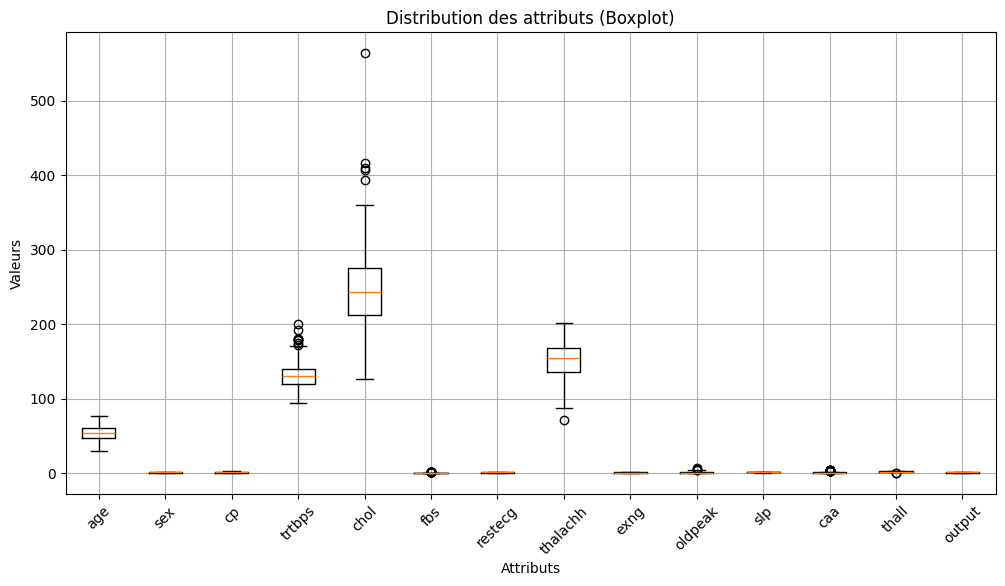

In [30]:
# 🎯 Appel de la fonction pour tester avec les données
box_plot(data)

### 📊 Scatter Plots

#### ✅ Summary of Relationships Between Attributes in the Scatter Plot
Based on the scatter plot matrix, here’s a summary of the relationships between different attributes in the dataset:


1.   **Strong Relationships (Clear Correlation)**

*   **Oldpeak & Slope (slp) → Strong Negative Correlation (-0.59)**
→ As oldpeak (ST depression) increases, slp (slope of ST segment) decreases.
*   **Thalachh (Maximum Heart Rate) & Age → Negative Correlation**
→ Younger patients tend to have higher maximum heart rates.



2.   **Moderate Relationships (Some Correlation)**
*   Oldpeak & Output (Heart Disease) → Moderate Negative Correlation (-0.43)
→ Higher ST depression (oldpeak) is linked to a higher risk of heart disease (output).
*   Cp (Chest Pain Type) & Output → Moderate Positive Correlation (0.40)
→ Patients with higher chest pain types have a higher chance of heart disease.
*   Thalachh & Output → Moderate Positive Correlation (0.42)
→ Higher maximum heart rate is related to a higher risk of heart disease.
*  Exercise-Induced Angina (exng) & Output → Moderate Negative Correlation (-0.44)
→ If a patient has exercise-induced angina, they are more likely to have heart disease.
*  Caa (Number of Affected Vessels) & Output → Moderate Negative Correlation (-0.39)
→ A higher number of affected vessels is related to a higher risk of heart disease.

* Thallassemia (thall) & Output → Moderate Negative Correlation (-0.38)
→ Abnormal thallassemia levels correlate with heart disease.
3.    **Weak or No Significant Relationships**

*   Age & Cholesterol (chol) → Weak Positive Correlation (0.24)
→ Older individuals tend to have slightly higher cholesterol, but the relationship is weak.
*   Sex & Output → Weak Negative Correlation (-0.28)
→ Males have a slightly higher likelihood of heart disease, but it’s not strongly correlated.
*   Fasting Blood Sugar (fbs) & Output → No Significant Correlation (-0.02)
→ No clear relationship between fasting blood sugar levels and heart disease.


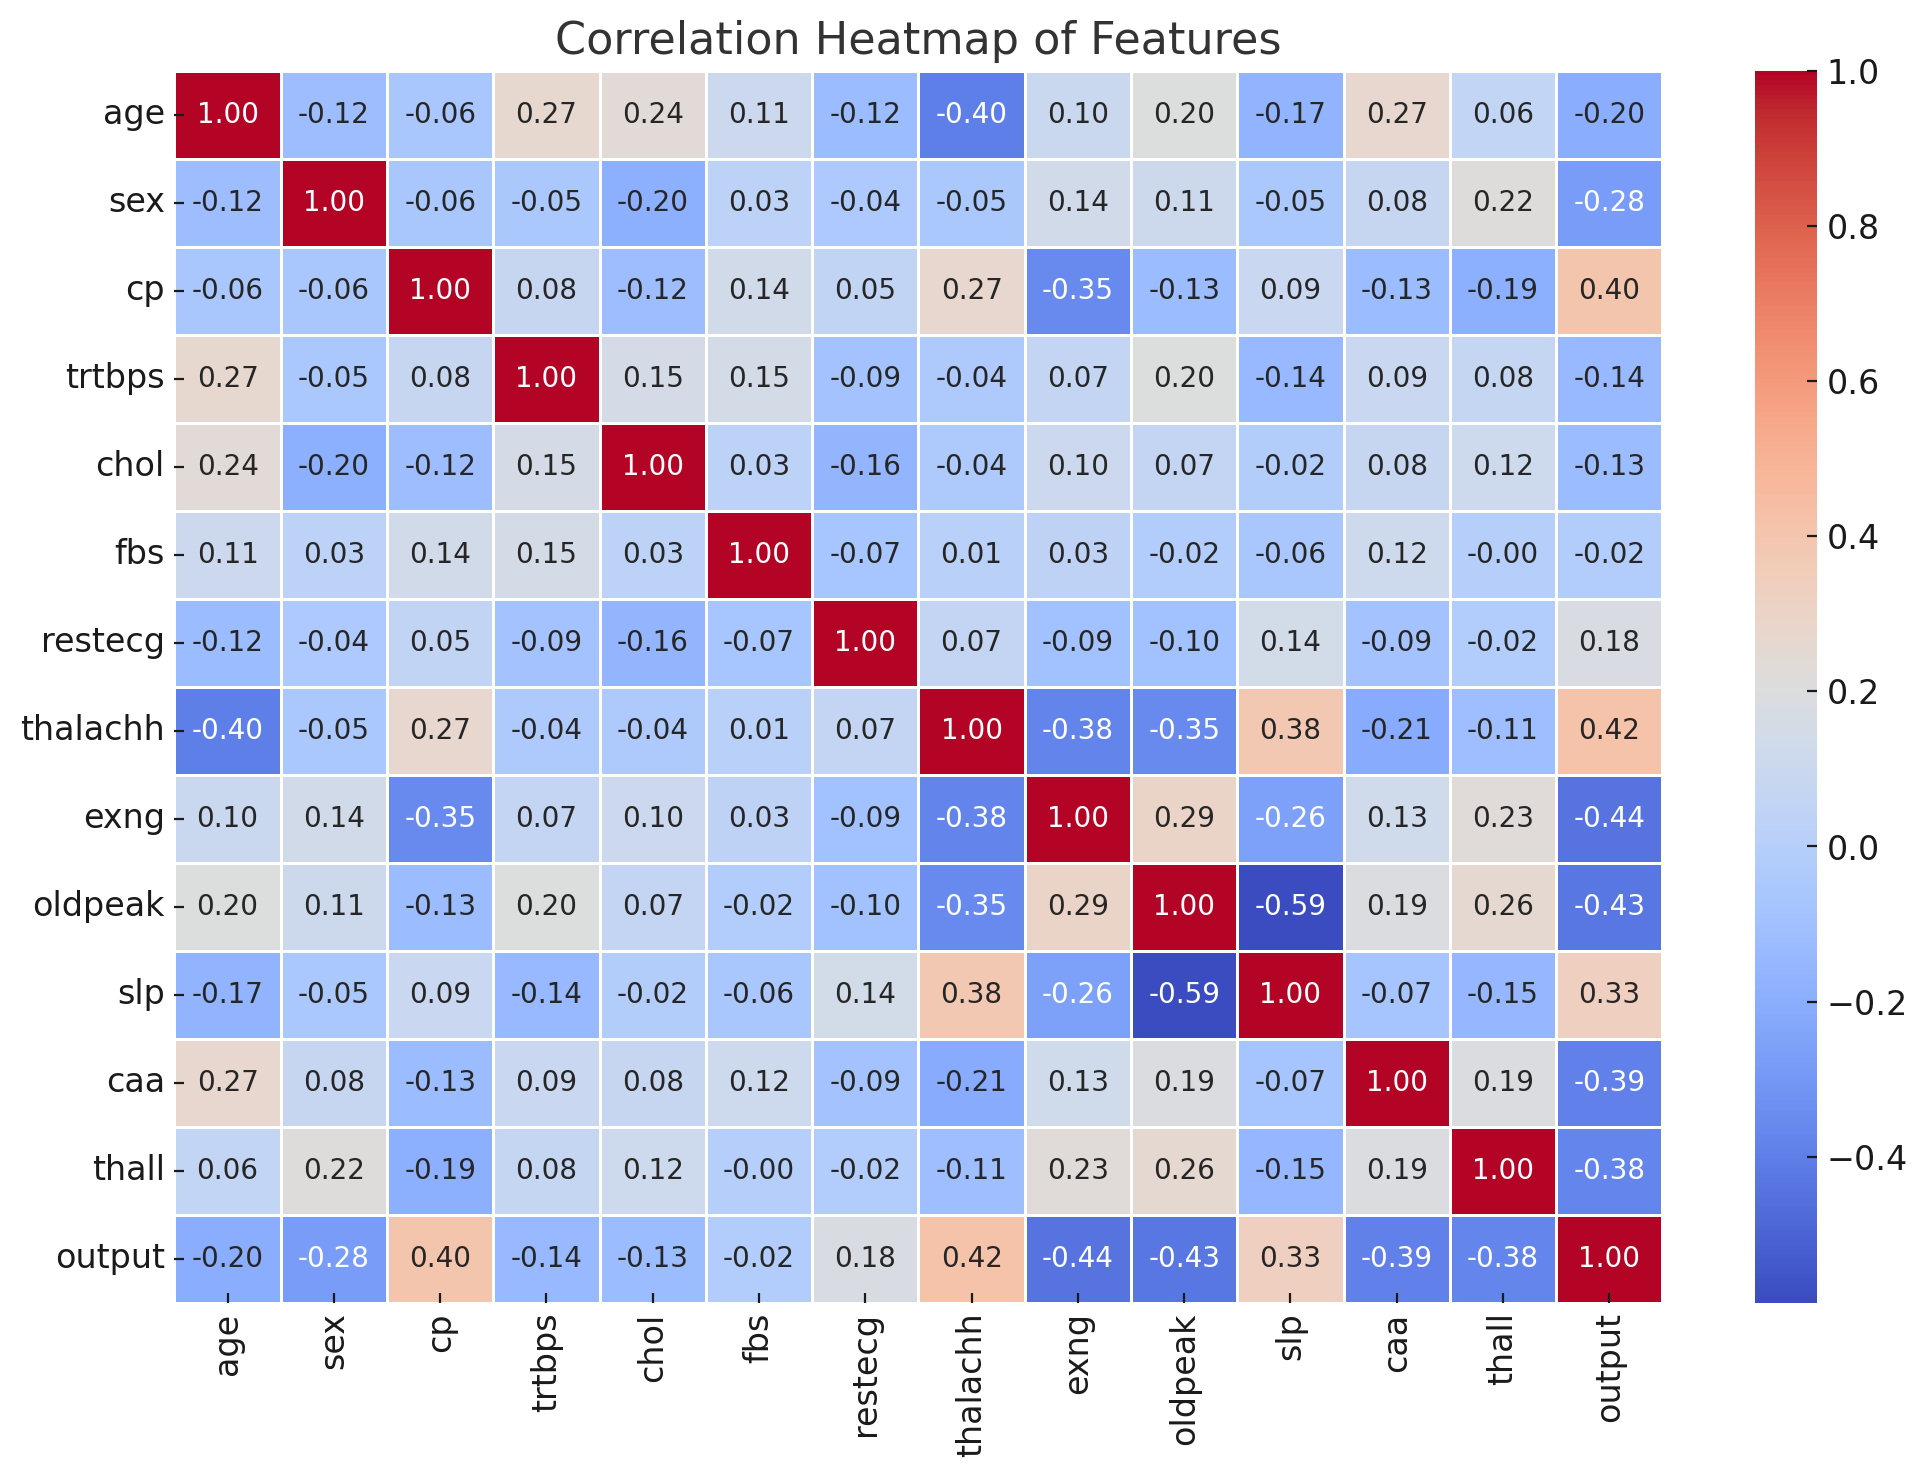

In [31]:

def scatter_plot_all(data, col1=None, col2=None):
    """Génère des scatter plots :
    - Si `col1` et `col2` sont spécifiés, affiche uniquement ce nuage de points.
    - Si aucun n'est spécifié, génère des scatter plots pour toutes les paires de colonnes numériques.
    """

    # Extraire les colonnes numériques
    numeric_columns = [col for col in data if any(is_numeric(val) for val in data[col] if val is not None)]

    if not numeric_columns:
        print("❌ Erreur : Aucune colonne numérique trouvée dans les données.")
        return

    # Cas où l'utilisateur spécifie deux colonnes
    if col1 and col2:
        if col1 not in numeric_columns or col2 not in numeric_columns:
            print(f"❌ Erreur : '{col1}' ou '{col2}' n'est pas une colonne numérique valide.")
            return

        valid_col1 = [val for val in data[col1] if val is not None and is_numeric(val)]
        valid_col2 = [val for val in data[col2] if val is not None and is_numeric(val)]

        if not valid_col1 or not valid_col2:
            print(f"❌ Erreur : '{col1}' ou '{col2}' ne contient pas de valeurs numériques valides.")
            return

        if len(valid_col1) != len(valid_col2):
            print(f"❌ Erreur : '{col1}' et '{col2}' ont des longueurs différentes après suppression des valeurs None.")
            return

        # Tracer le scatter plot des colonnes spécifiées
        plt.figure(figsize=(8, 6))
        plt.scatter(valid_col1, valid_col2, alpha=0.5, color='b')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f"Scatter Plot : {col1} vs {col2}")
        plt.grid(True)
        plt.show()

    else:
        # Cas où aucune colonne spécifique n'est donnée : on affiche toutes les paires de colonnes numériques
        num_cols = len(numeric_columns)
        if num_cols < 2:
            print("❌ Erreur : Au moins deux colonnes numériques sont nécessaires pour un scatter plot.")
            return

        # Générer les scatter plots pour toutes les combinaisons possibles de colonnes
        fig, axes = plt.subplots(num_cols, num_cols, figsize=(15, 15))

        for i in range(num_cols):
            for j in range(num_cols):
                if i != j:  # Éviter les scatter plots d'une colonne avec elle-même
                    valid_col1 = [val for val in data[numeric_columns[i]] if val is not None and is_numeric(val)]
                    valid_col2 = [val for val in data[numeric_columns[j]] if val is not None and is_numeric(val)]

                    if valid_col1 and valid_col2 and len(valid_col1) == len(valid_col2):
                        axes[i, j].scatter(valid_col1, valid_col2, alpha=0.5, color='b')
                        axes[i, j].set_xlabel(numeric_columns[i])
                        axes[i, j].set_ylabel(numeric_columns[j])
                    else:
                        axes[i, j].axis('off')  # Désactiver les sous-graphiques vides

        plt.suptitle("Scatter Plots pour toutes les paires de colonnes numériques", fontsize=16)
        plt.show()


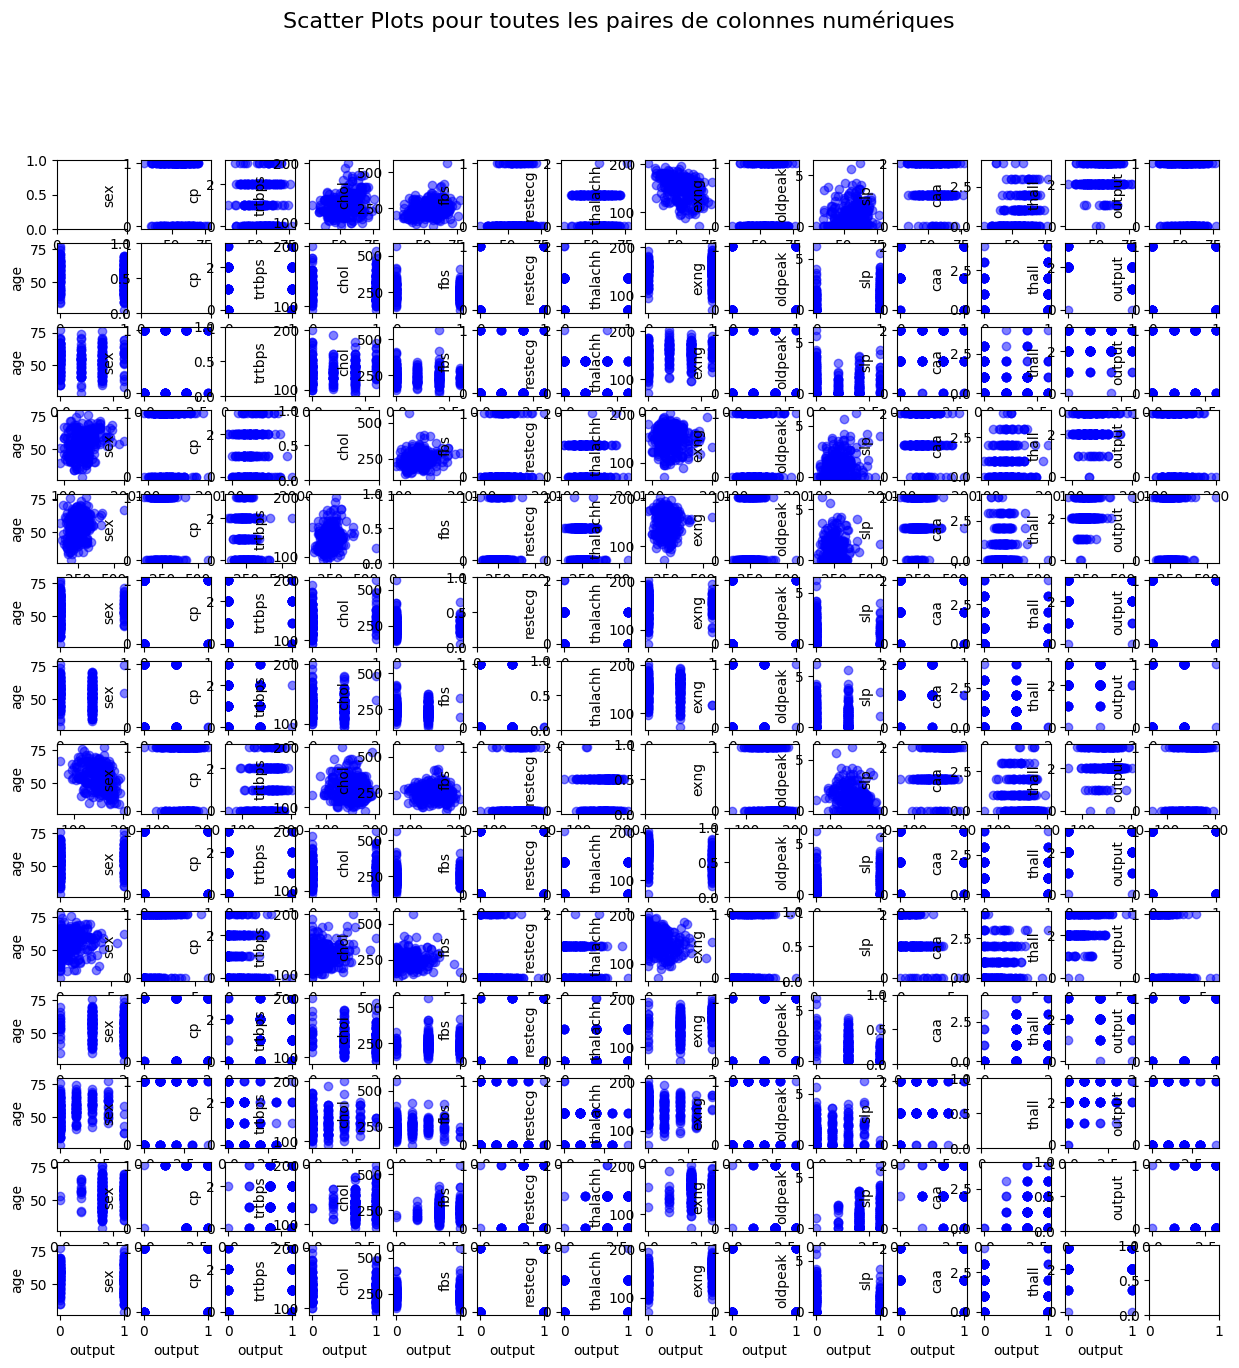

In [32]:
#🎯 Example usage:
scatter_plot_all(data)  # Tracera toutes les combinaisons numériques


In [33]:
def scatter_plot(data, col1=None, col2=None):
    """Generate scatter plots:
    - If col1 and col2 are provided, plot only those columns.
    - If no columns are specified, plot all numeric column pairs."""

    # Extract numerical columns
    # On filtre les colonnes contenant uniquement des valeurs numériques
    numeric_columns = [col for col in data if all(is_numeric(val) for val in data[col] if val is not None)]

    if col1 and col2:
        # Cas où l'utilisateur a spécifié deux colonnes

        # Vérifier si les colonnes sélectionnées sont bien numériques
        if col1 not in numeric_columns or col2 not in numeric_columns:
            print(f"Erreur : '{col1}' ou '{col2}' n'est pas une colonne numérique valide.")
            return

        # Filtrer les valeurs valides (non None et numériques)
        valid_col1 = [val for val in data[col1] if val is not None and is_numeric(val)]
        valid_col2 = [val for val in data[col2] if val is not None and is_numeric(val)]

        # Vérifier si les colonnes contiennent bien des valeurs après filtrage
        if manual_len(valid_col1) == 0 or manual_len(valid_col2) == 0:
            print(f"Erreur : '{col1}' ou '{col2}' ne contient pas de valeurs numériques valides.")
            return

        # Vérifier que les deux colonnes ont la même longueur après suppression des valeurs None
        if manual_len(valid_col1) != manual_len(valid_col2):
            print(f"Erreur : '{col1}' et '{col2}' ont des longueurs différentes après suppression des 'None'.")
            return

        # Tracer le scatter plot entre les deux colonnes spécifiées
        plt.figure(figsize=(8, 6))
        plt.scatter(valid_col1, valid_col2, alpha=0.5)  # Ajout de transparence pour meilleure visibilité
        plt.xlabel(col1)  # Nom de l'axe X
        plt.ylabel(col2)  # Nom de l'axe Y
        plt.title(f"Scatter Plot : {col1} vs {col2}")  # Titre du graphique
        plt.grid(True)  # Afficher la grille pour une meilleure lisibilité
        plt.show()

    else:
        # Cas où aucune colonne spécifique n'est fournie, on trace toutes les paires de colonnes numériques possibles
        for i in range(len(numeric_columns)):
            for j in range(i + 1, len(numeric_columns)):  # Éviter les doublons (col1 == col2)
                scatter_plot(data, numeric_columns[i], numeric_columns[j])  # Appel récursif pour tracer chaque paire


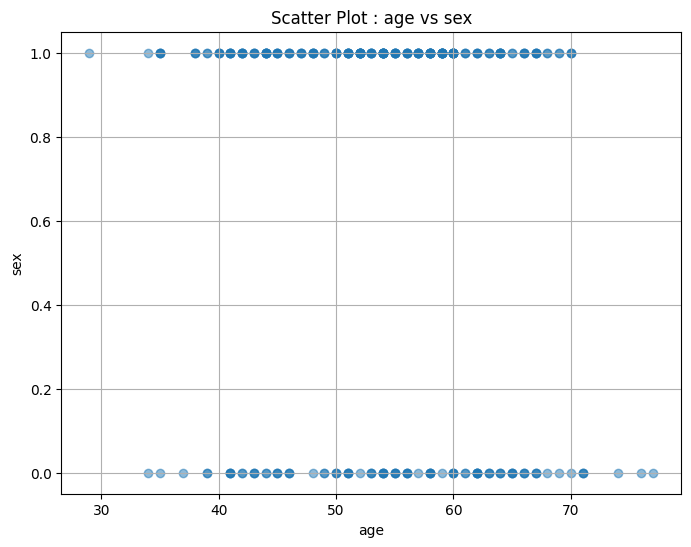

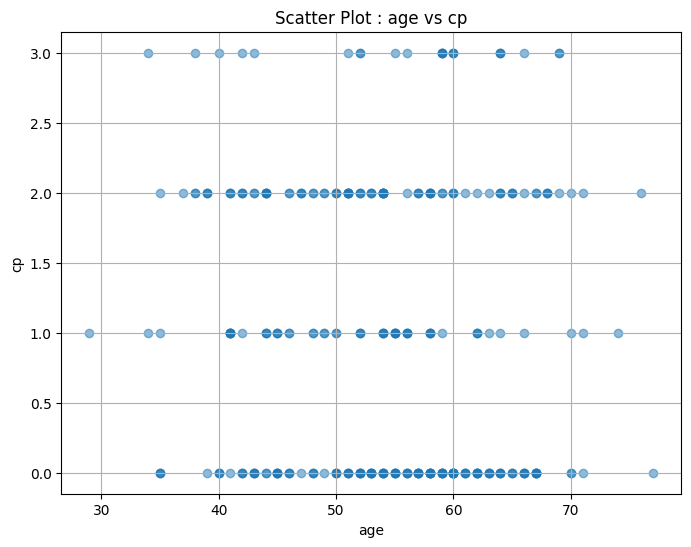

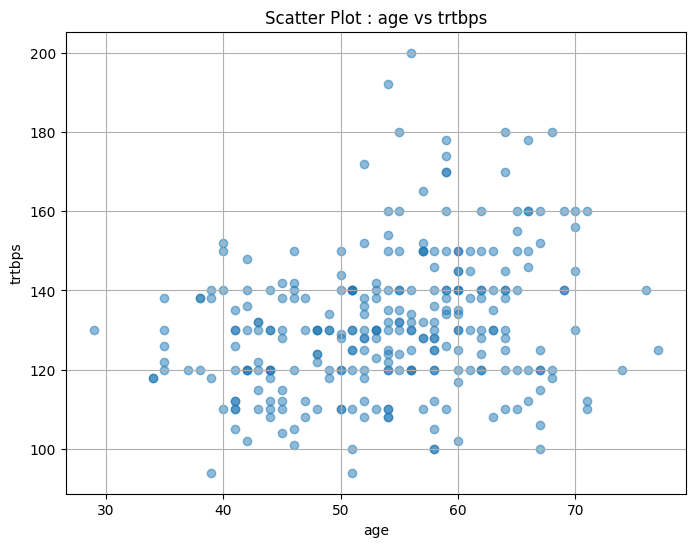

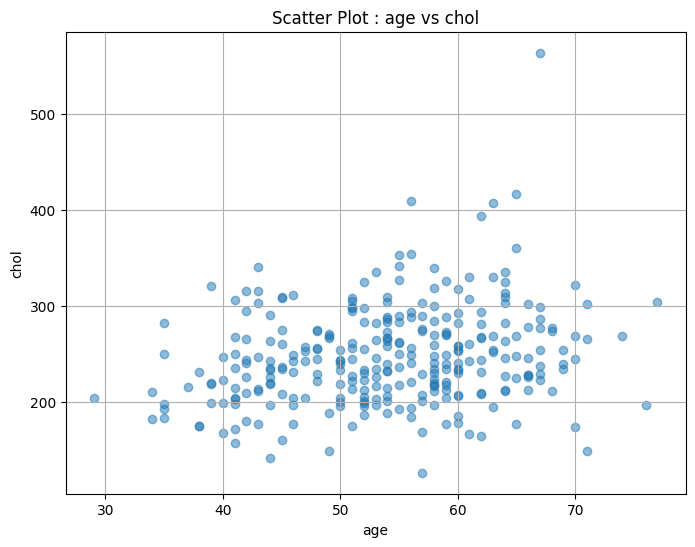

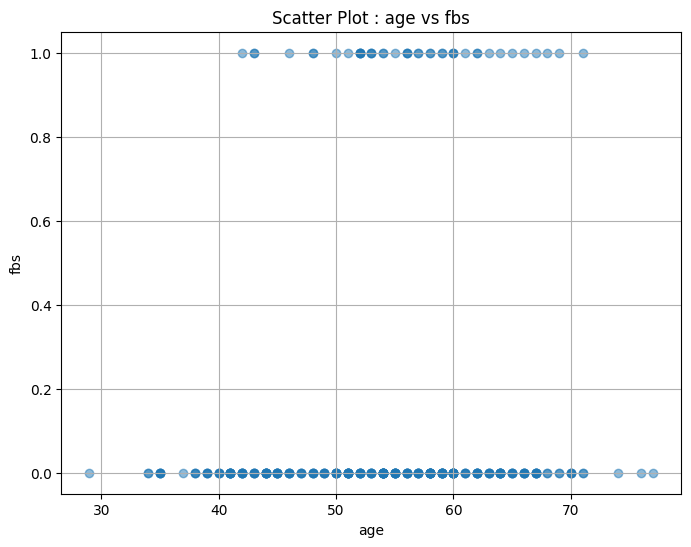

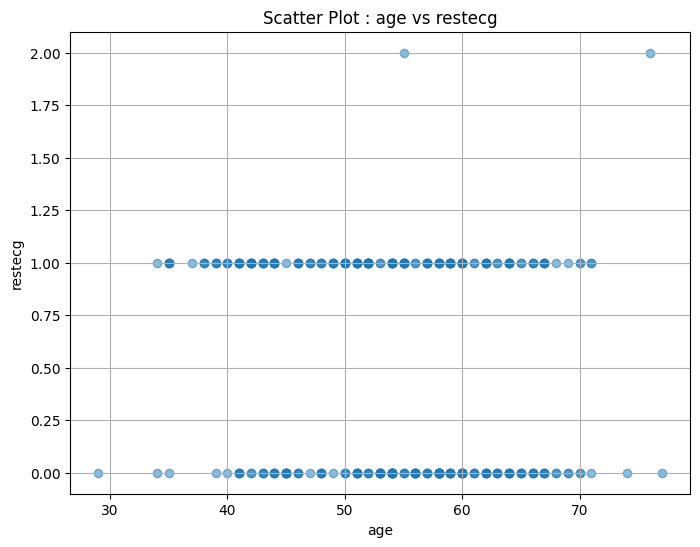

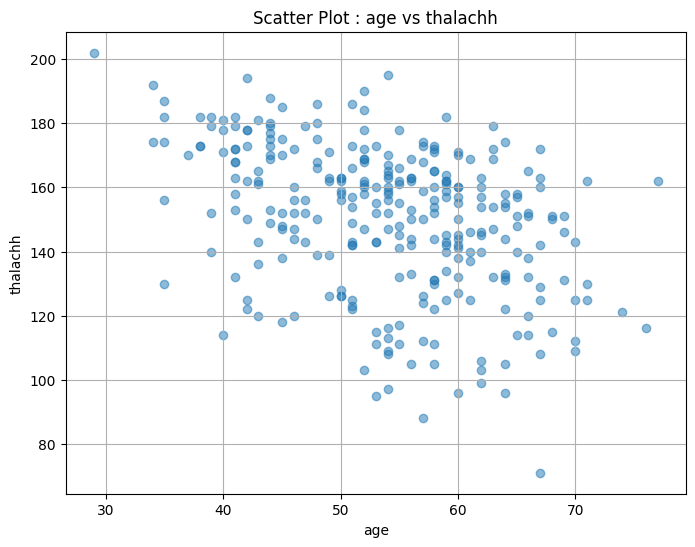

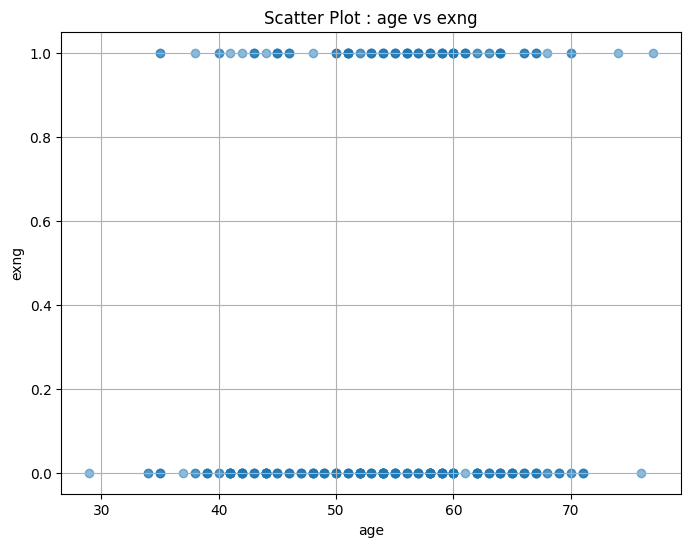

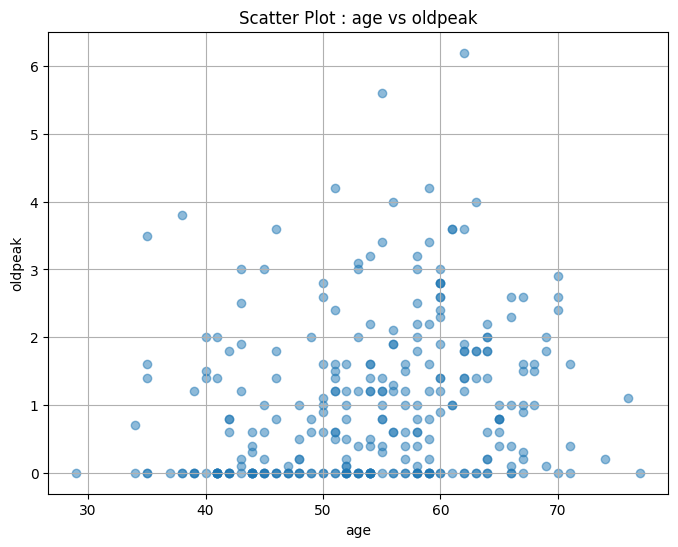

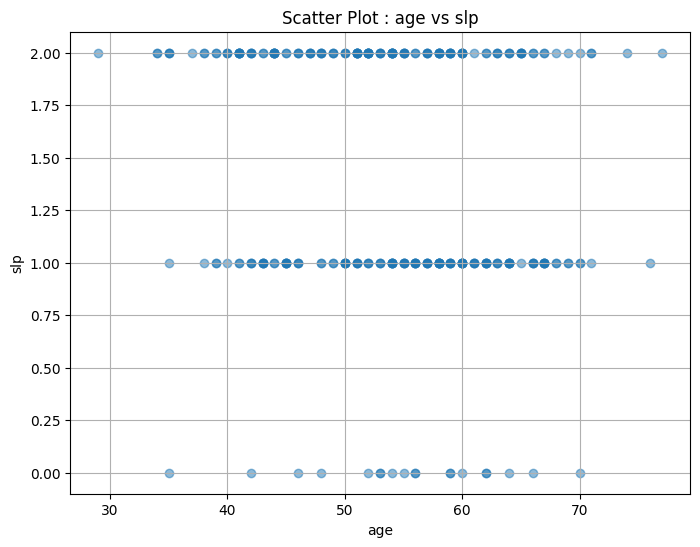

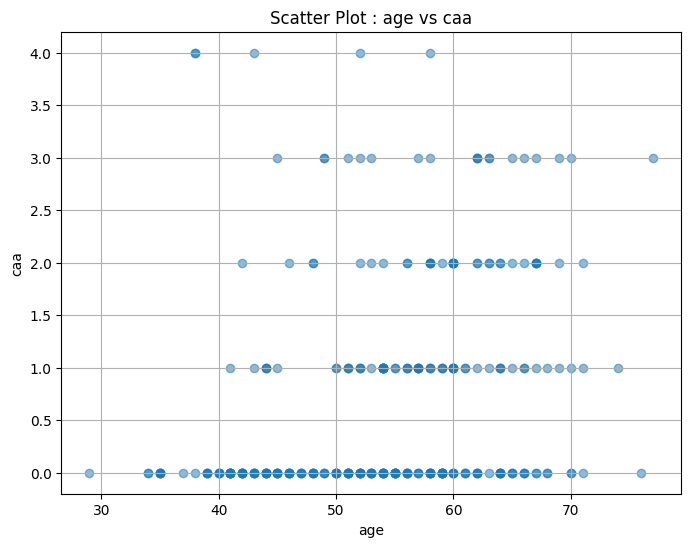

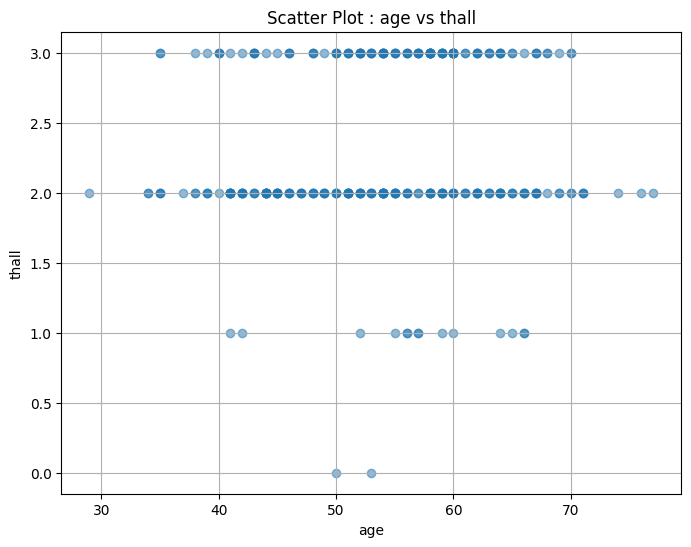

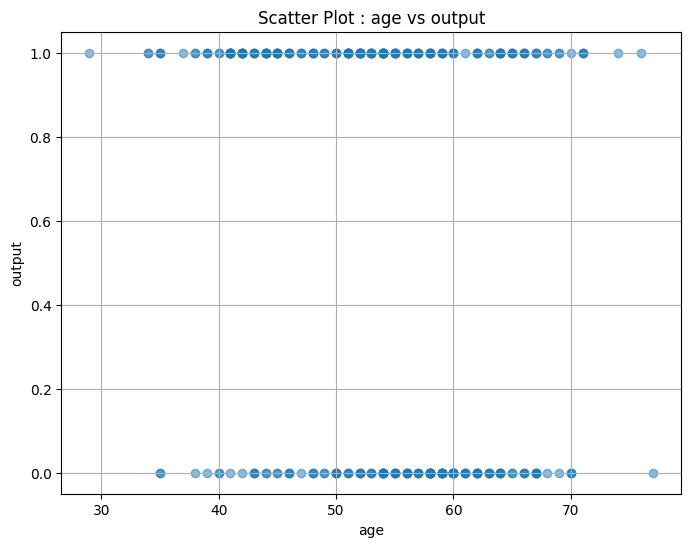

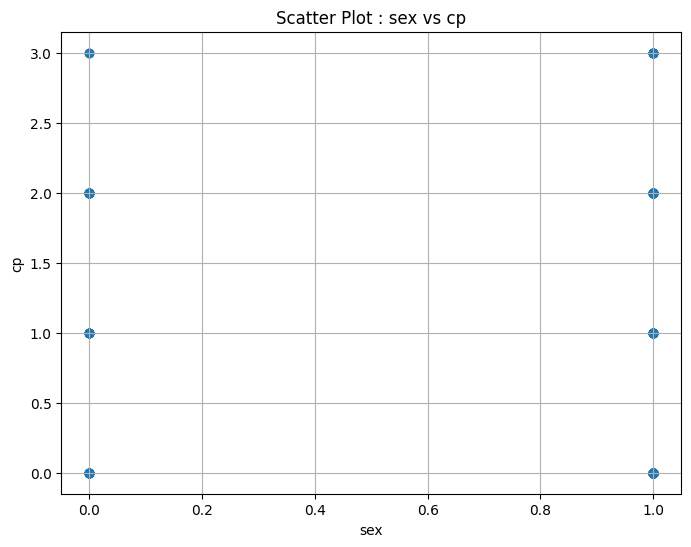

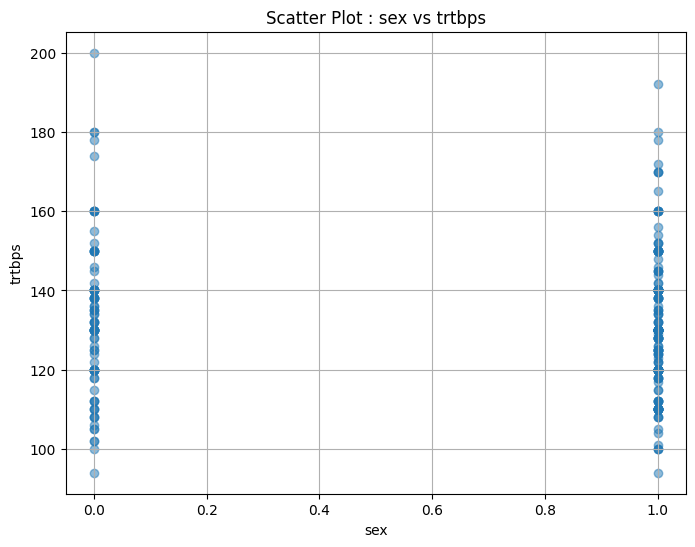

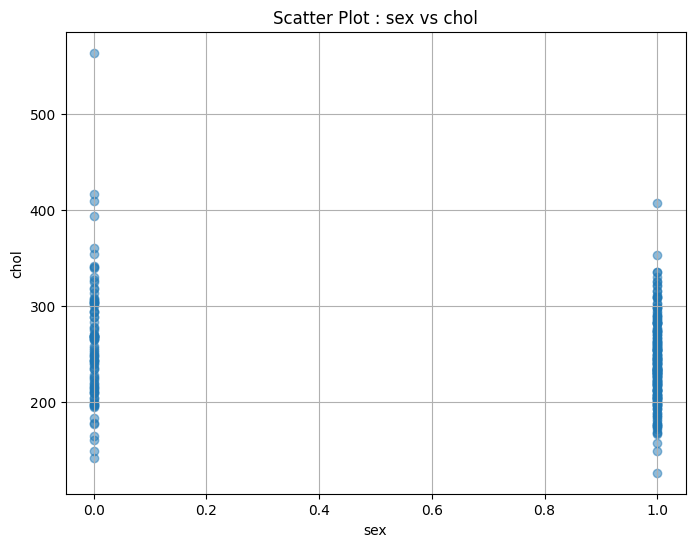

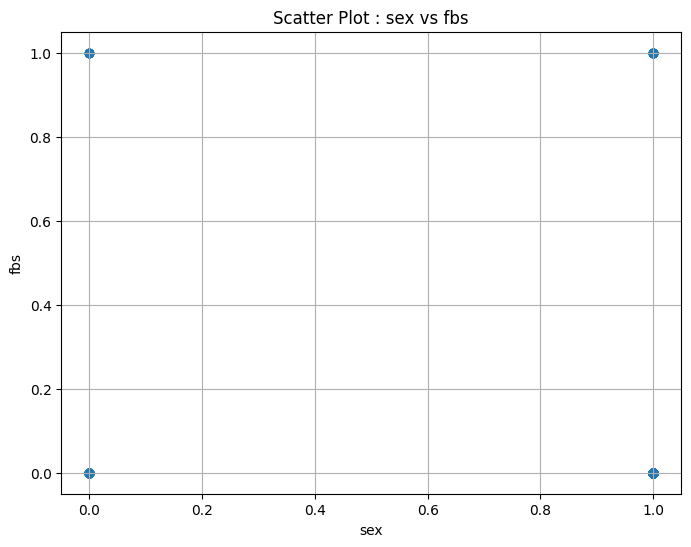

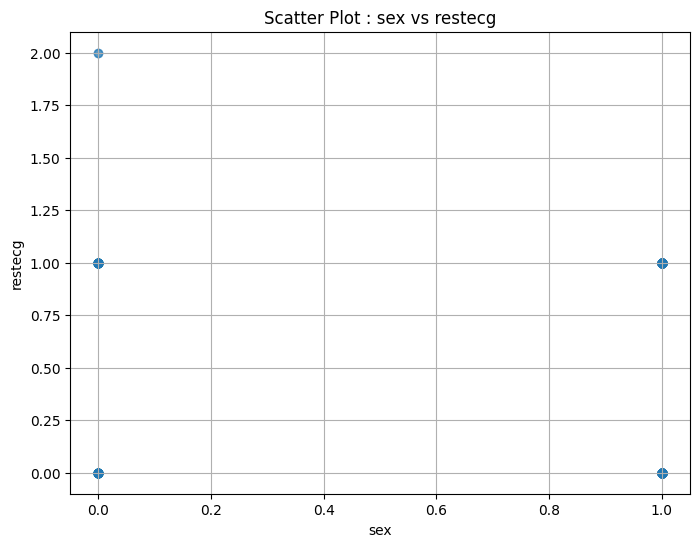

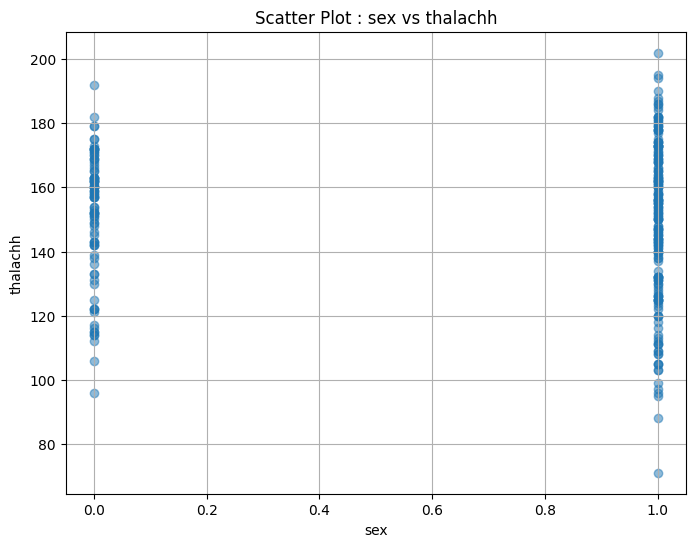

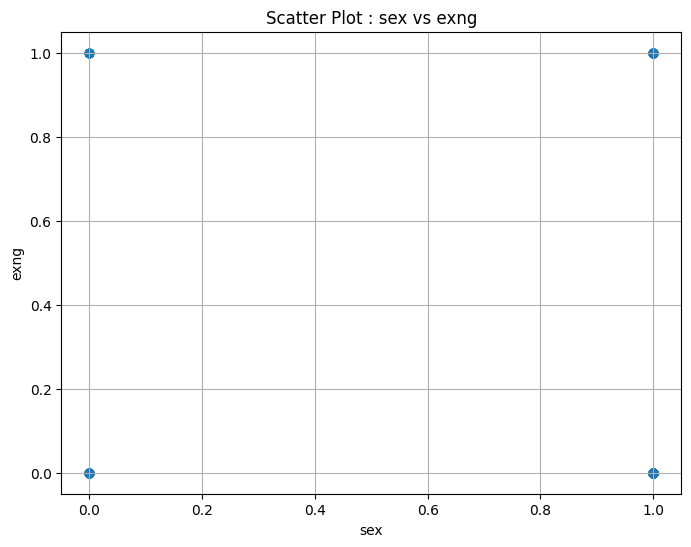

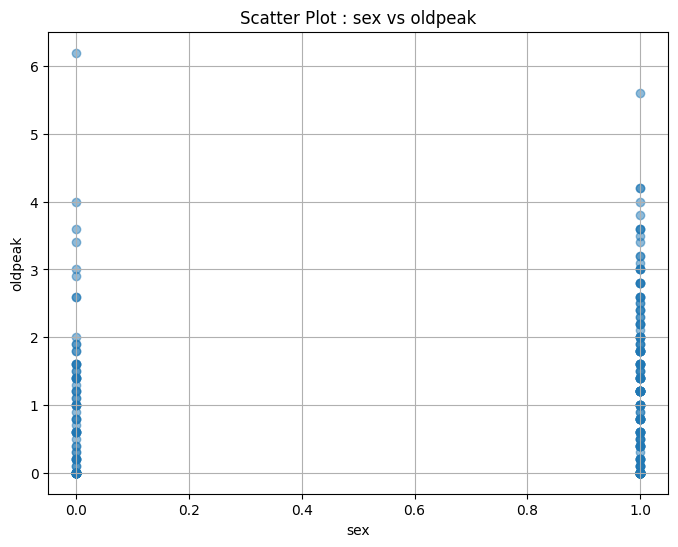

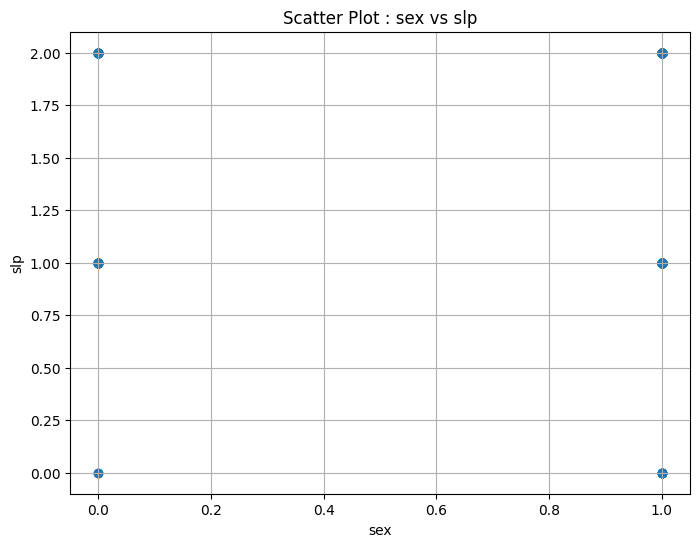

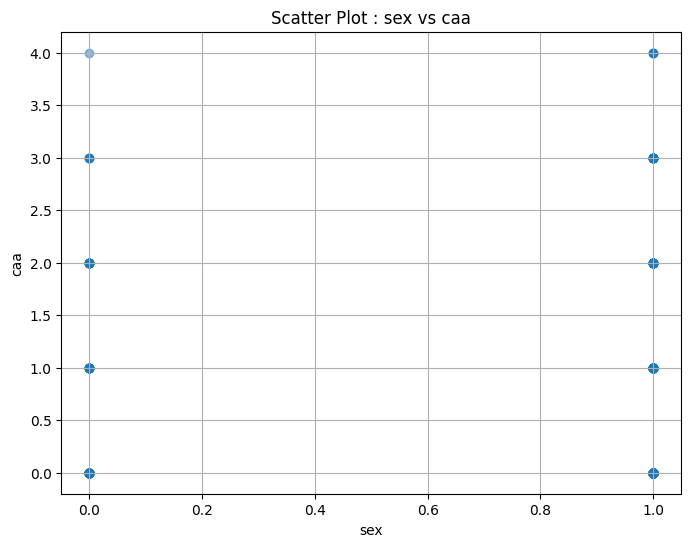

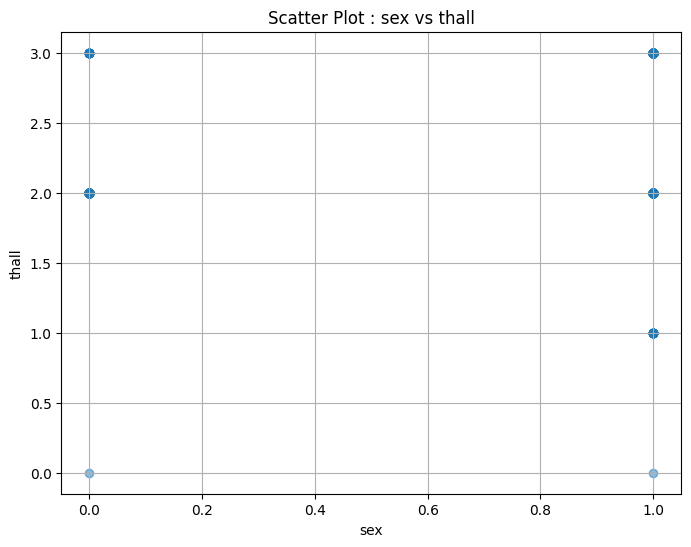

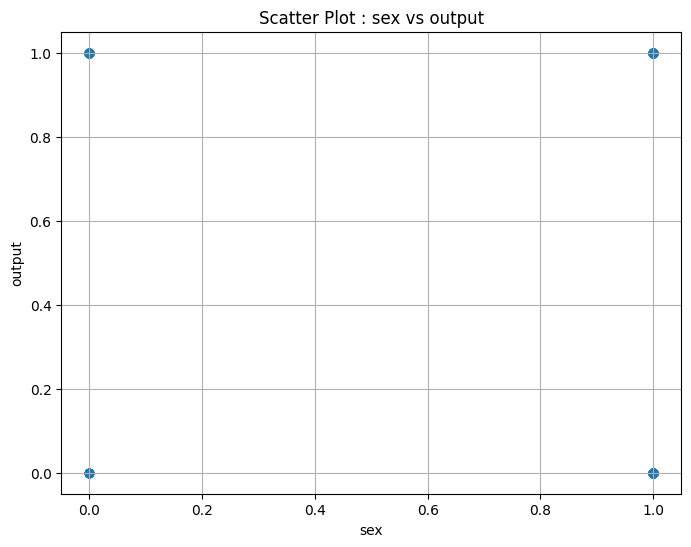

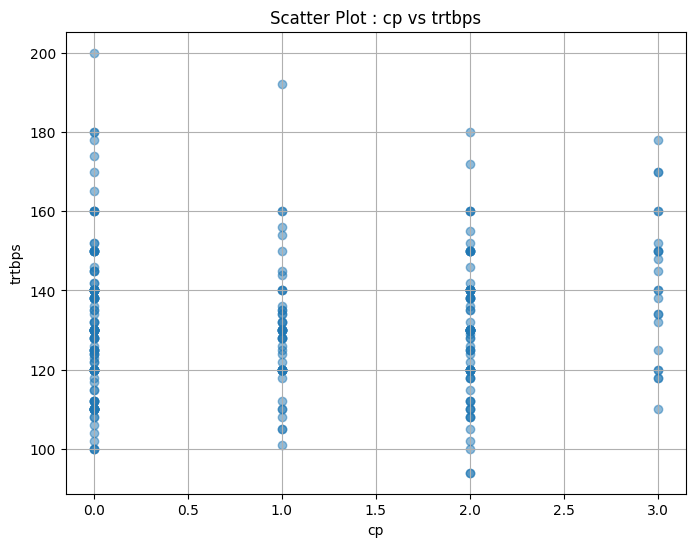

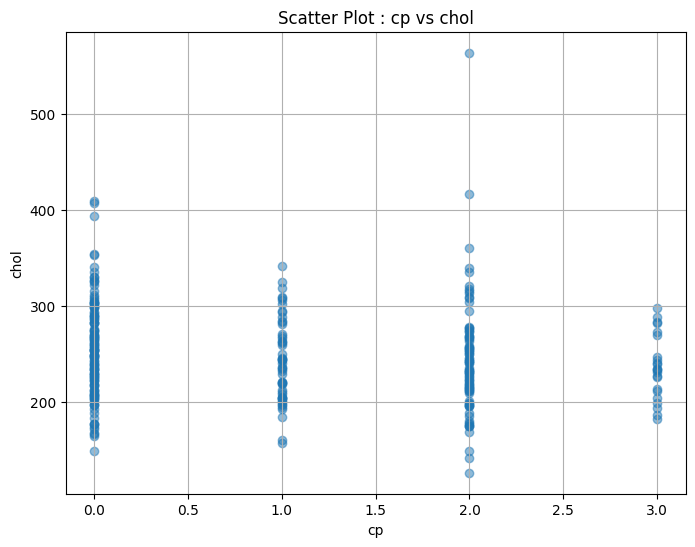

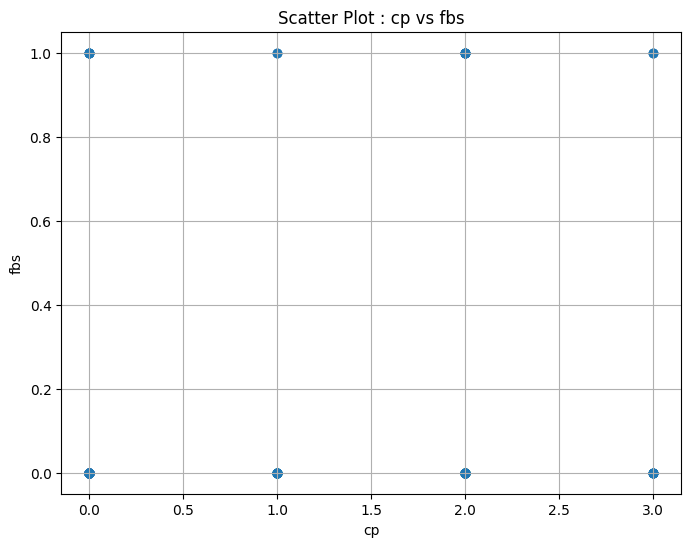

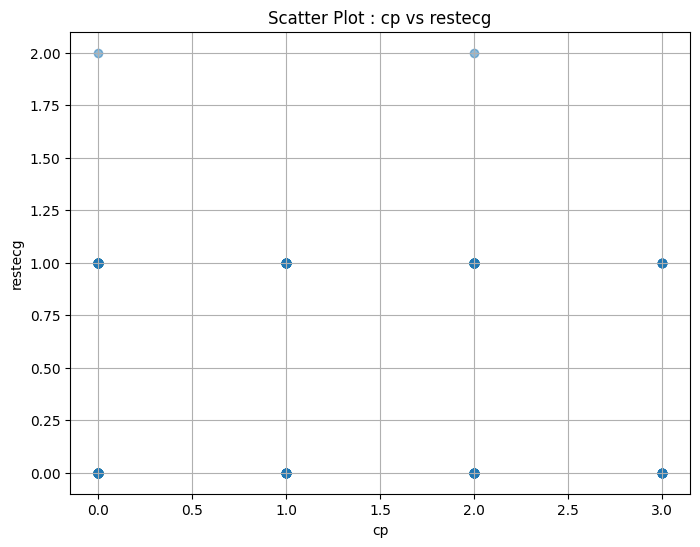

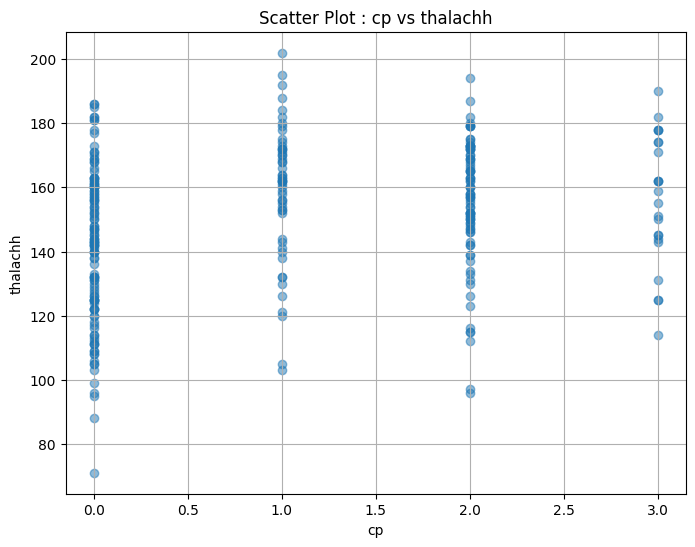

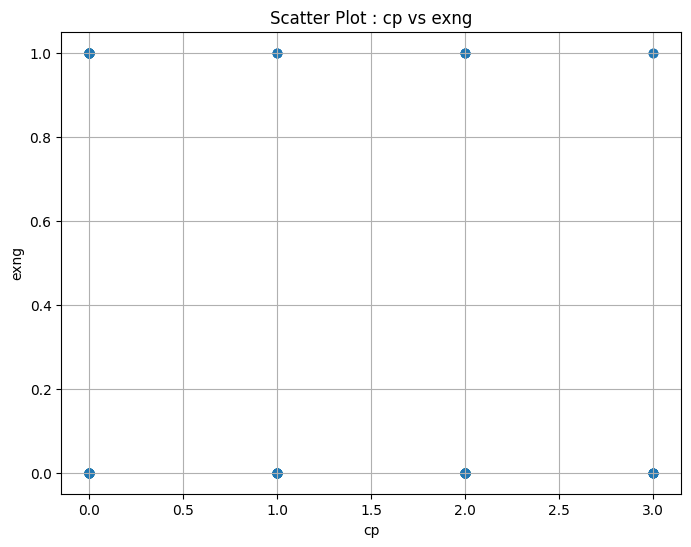

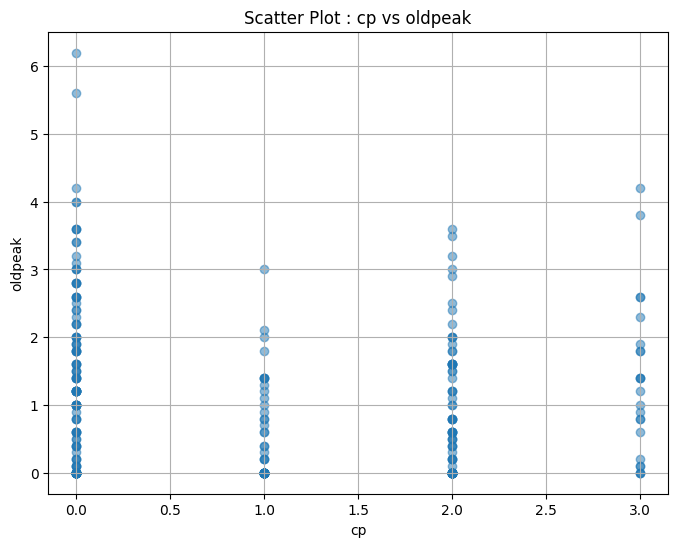

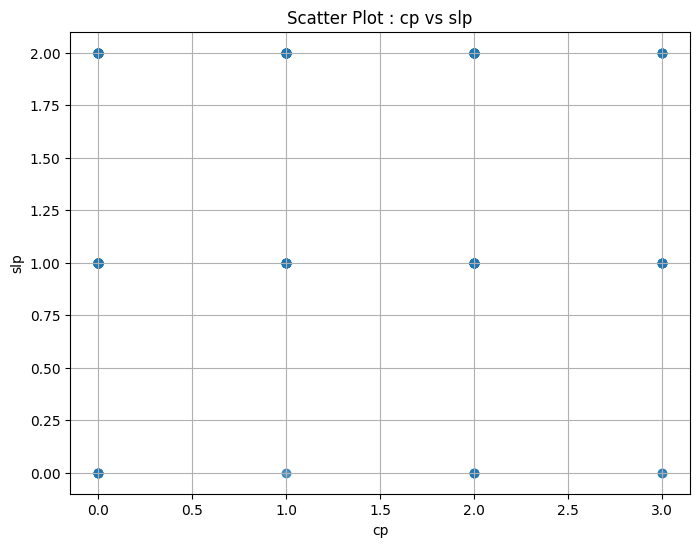

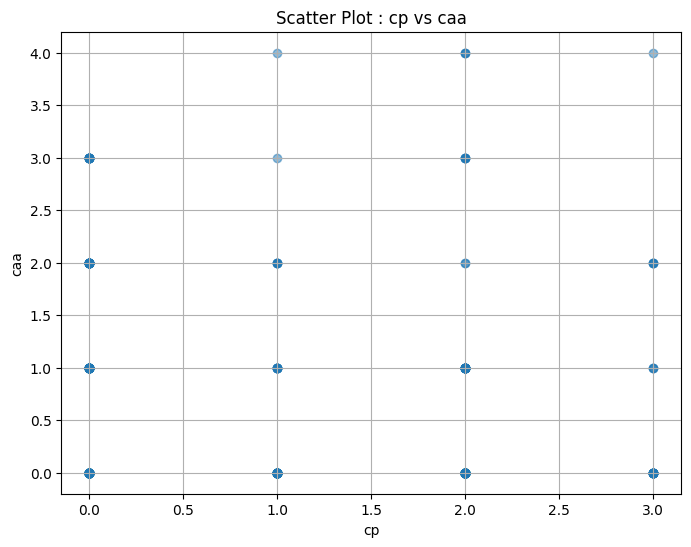

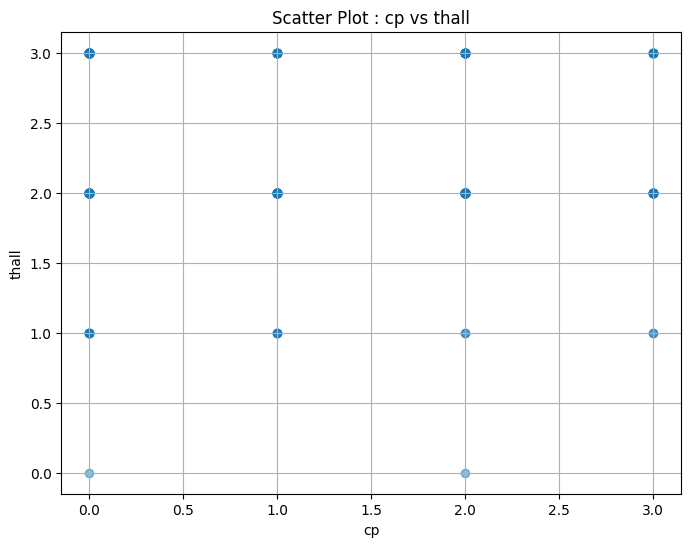

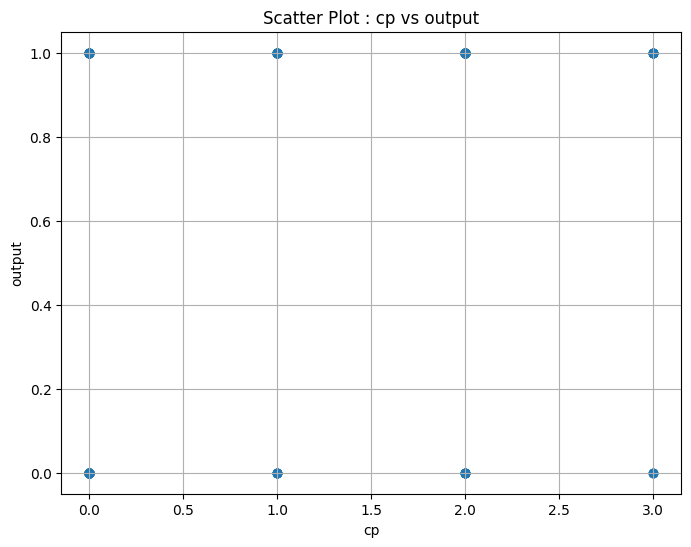

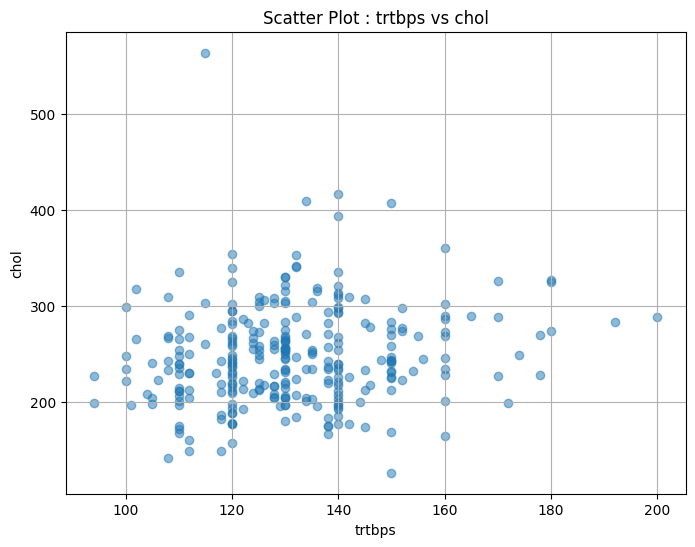

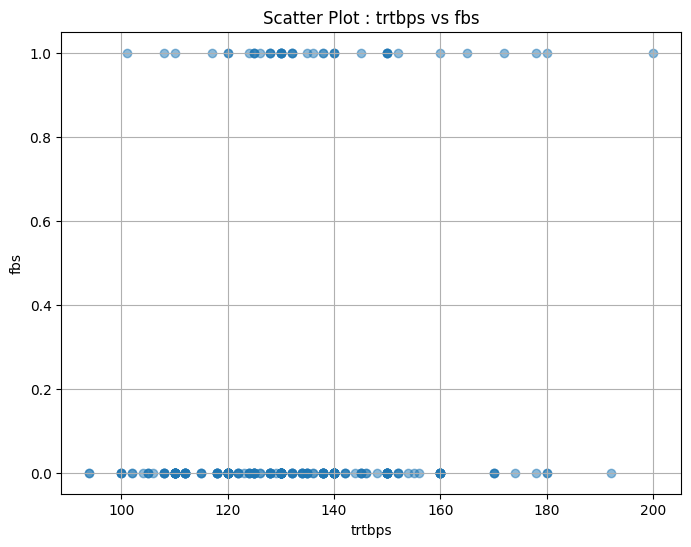

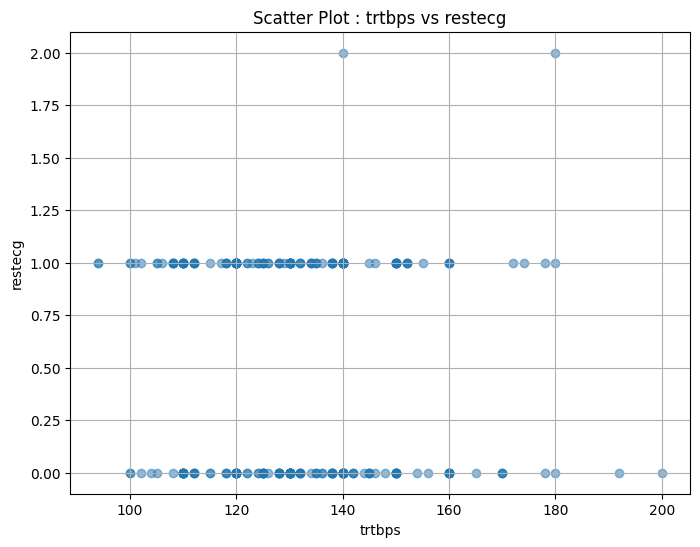

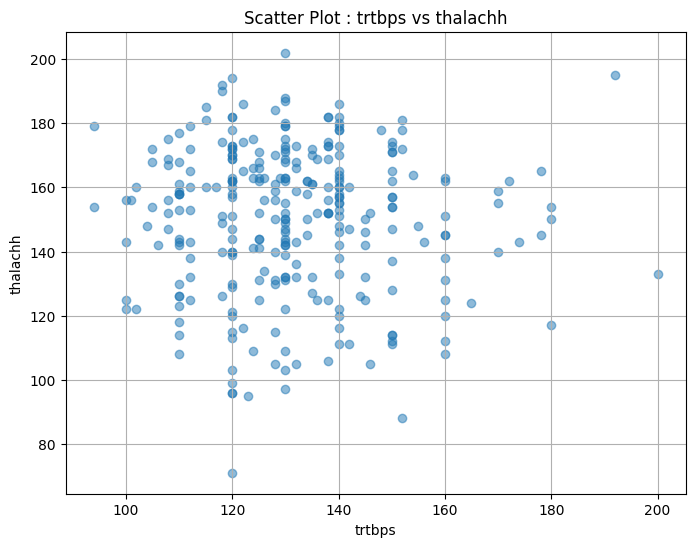

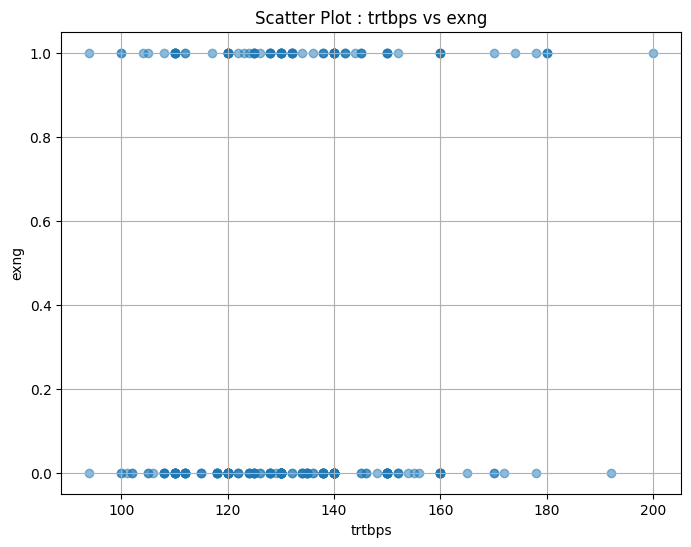

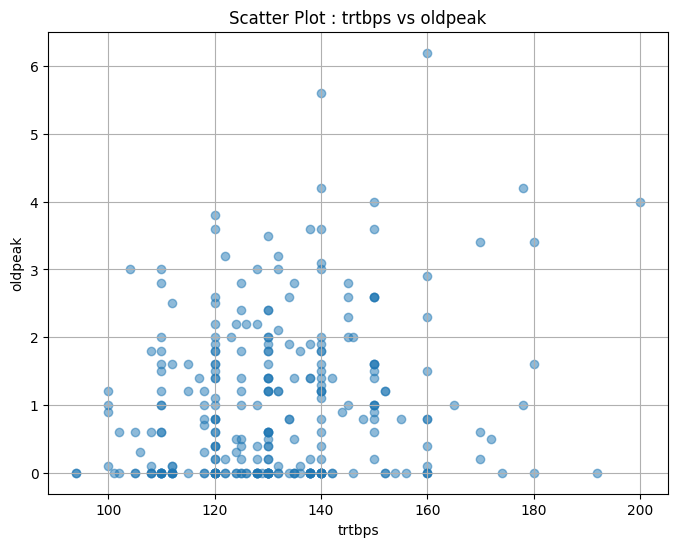

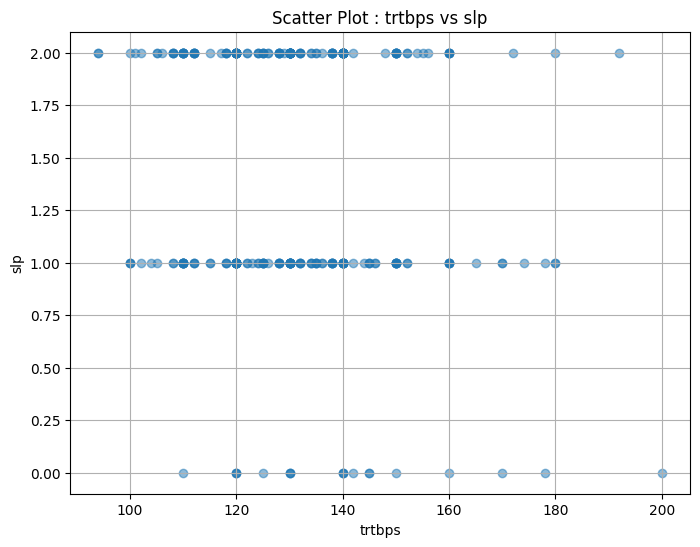

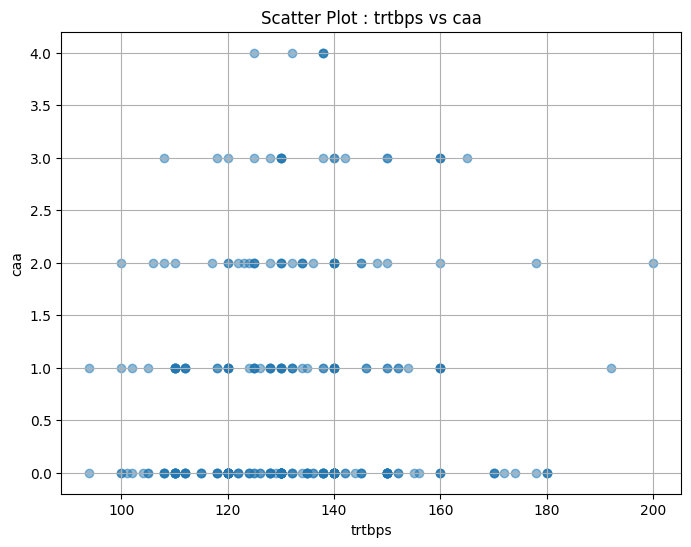

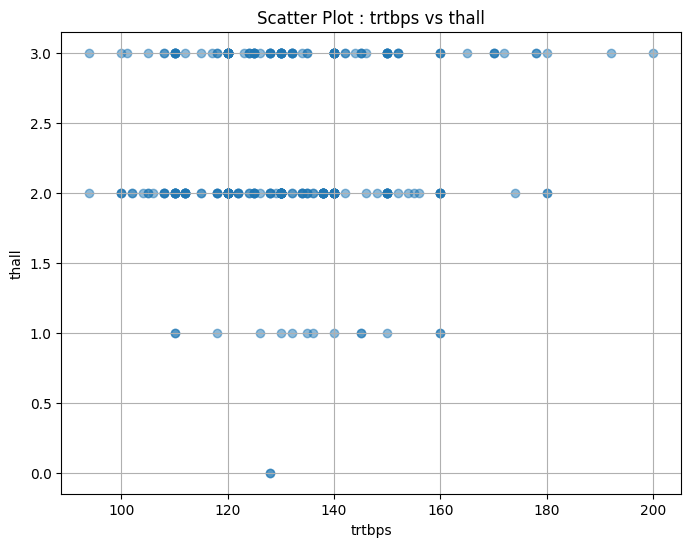

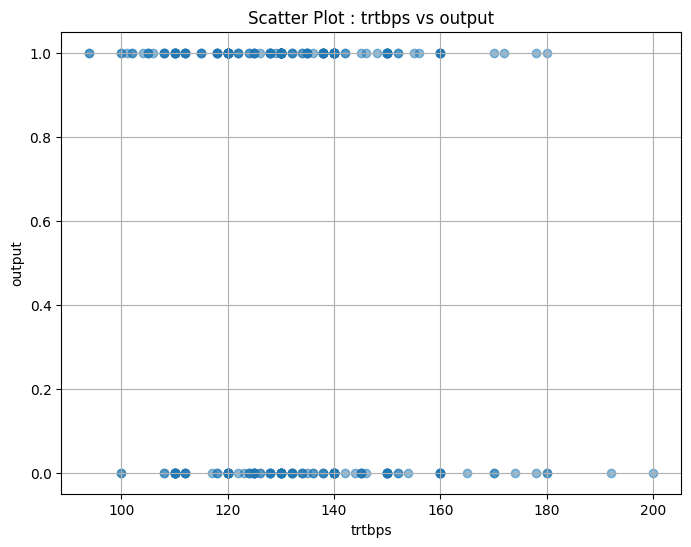

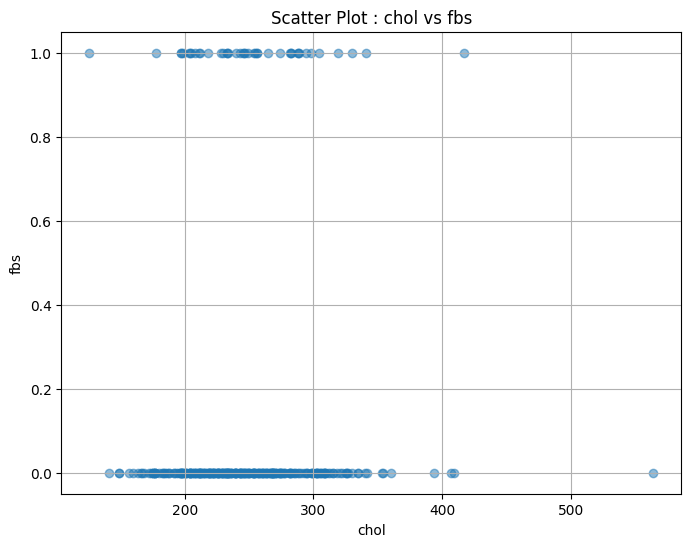

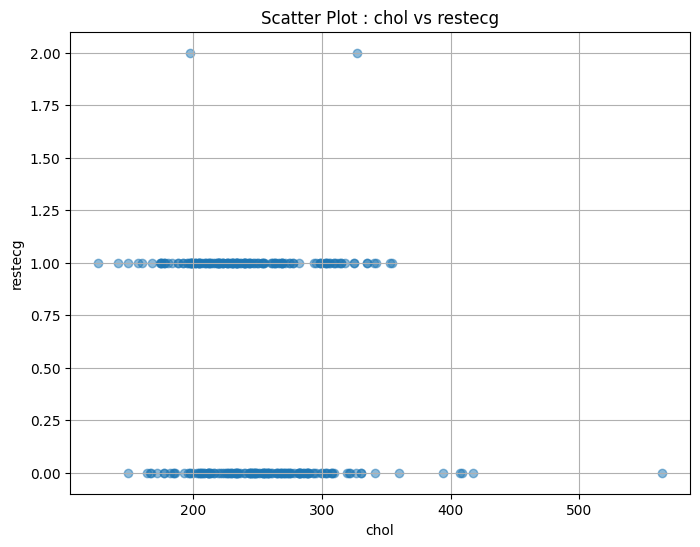

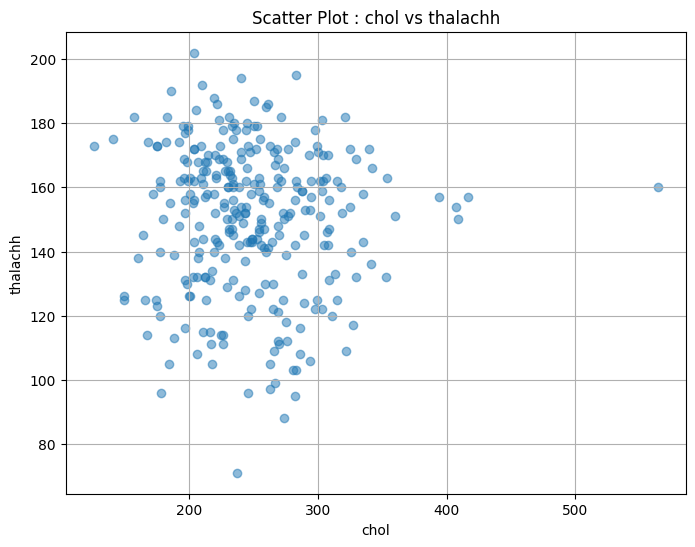

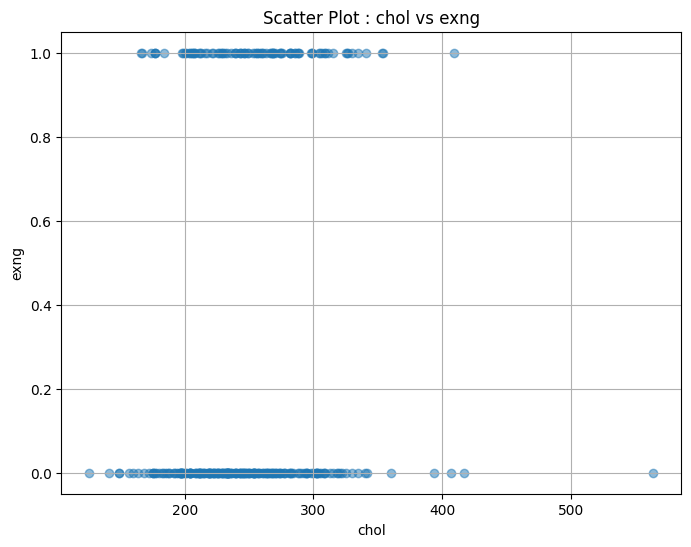

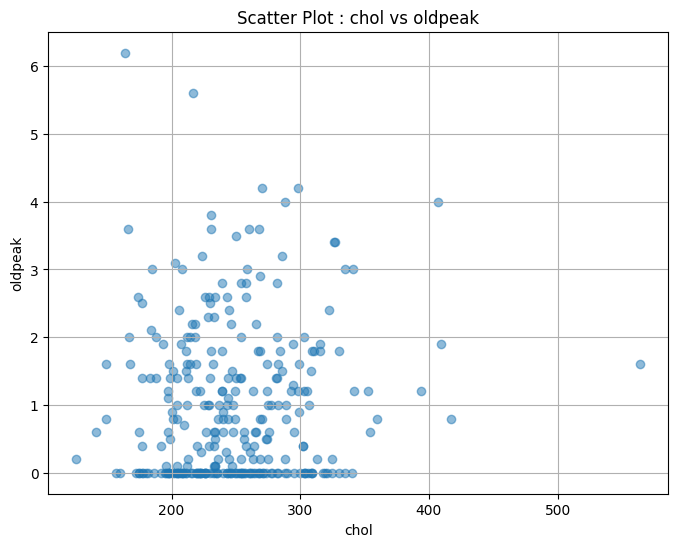

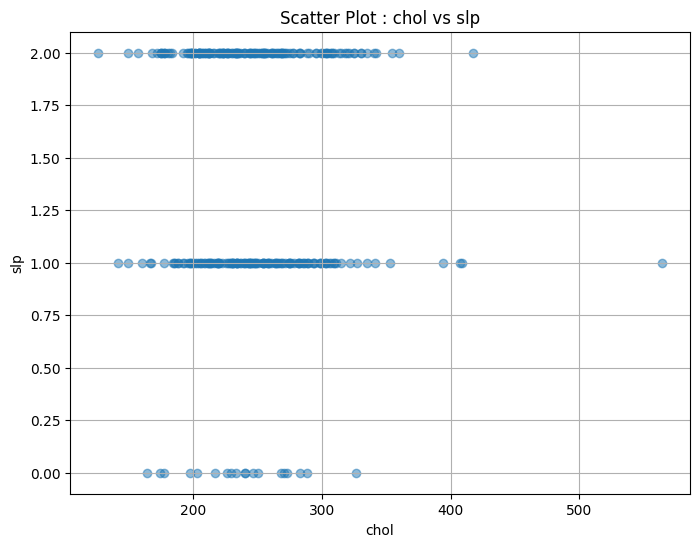

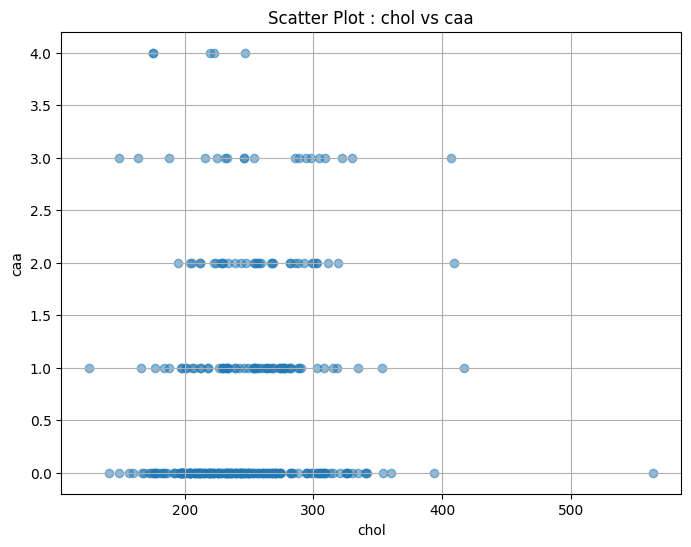

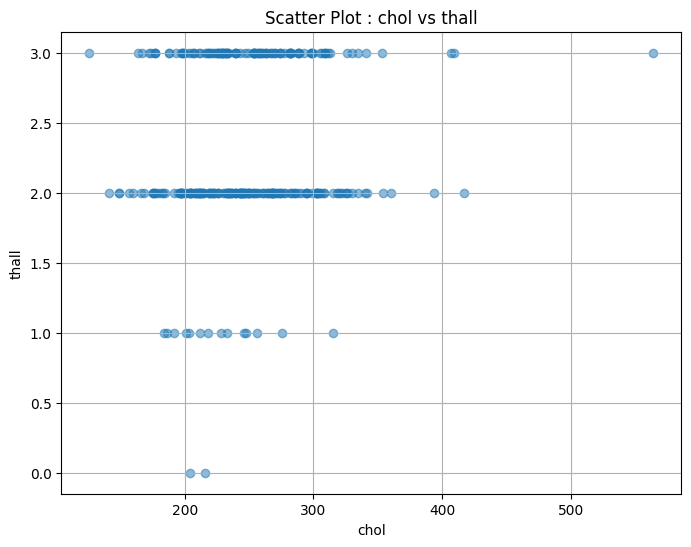

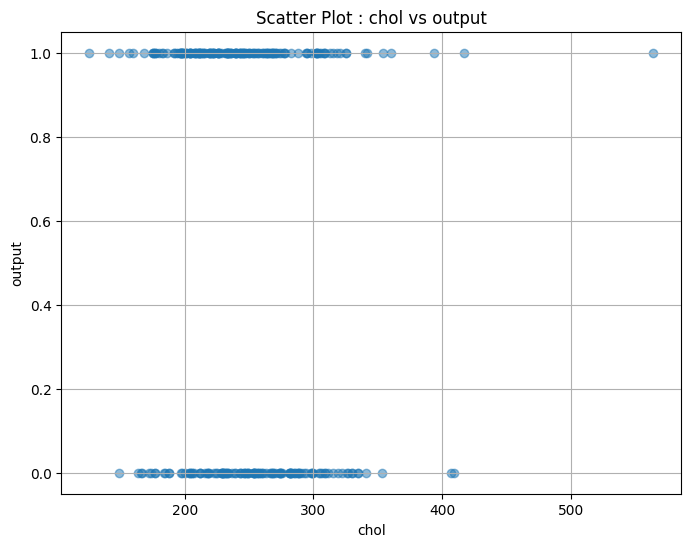

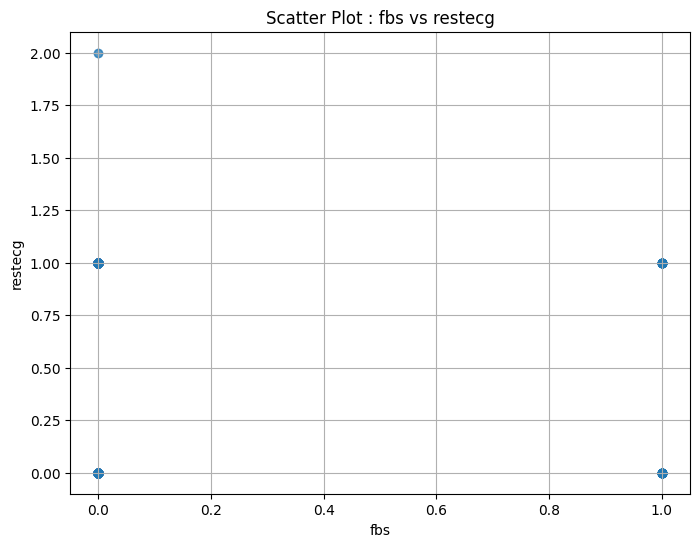

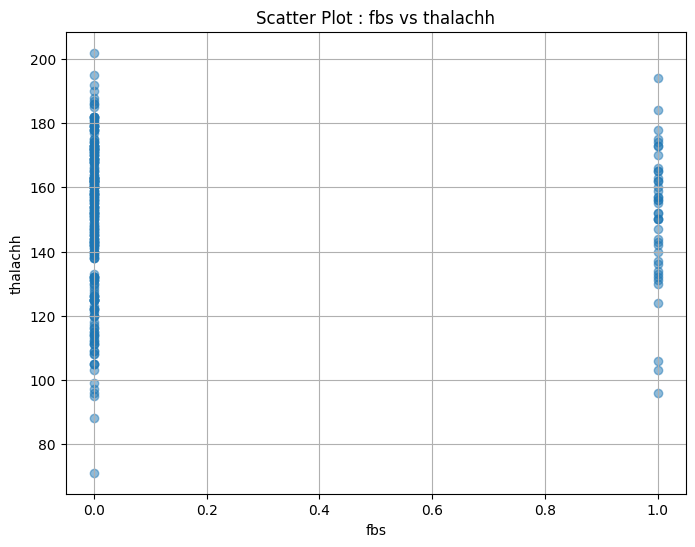

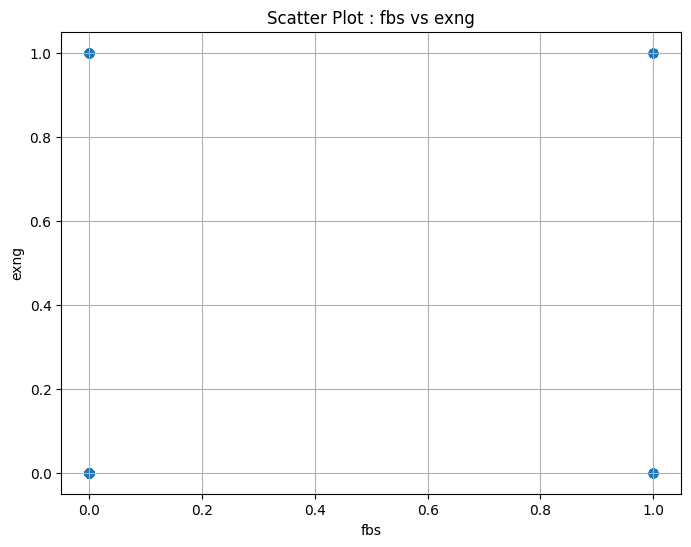

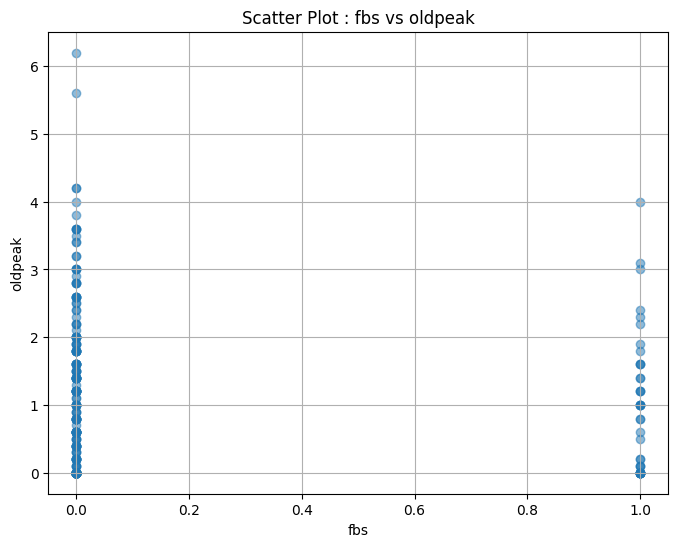

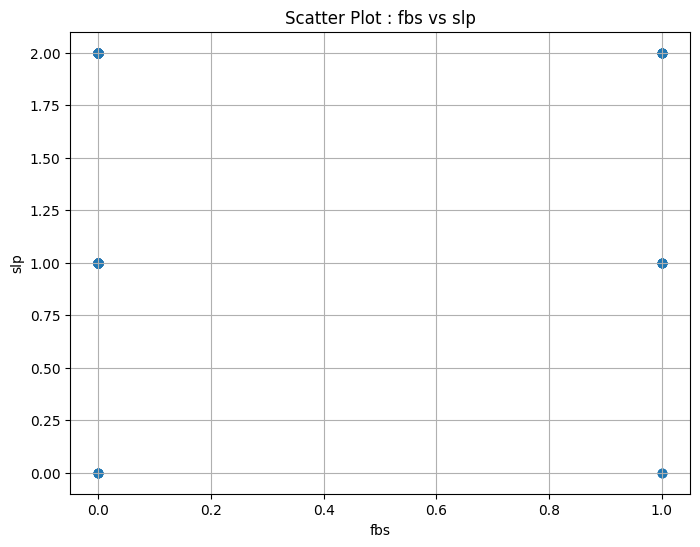

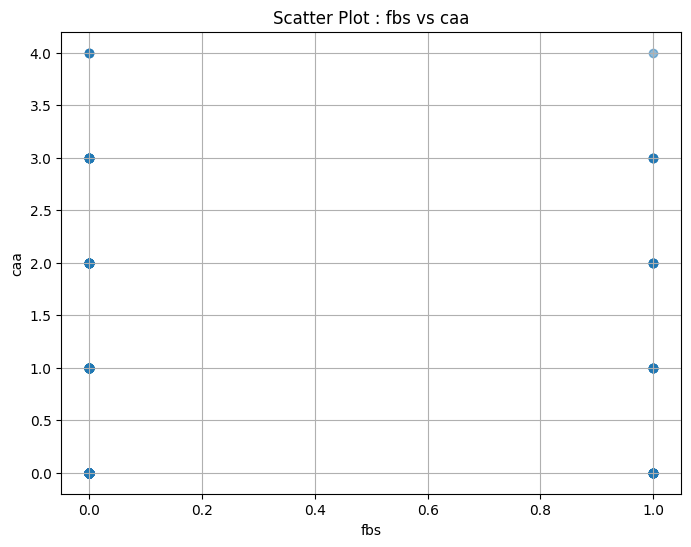

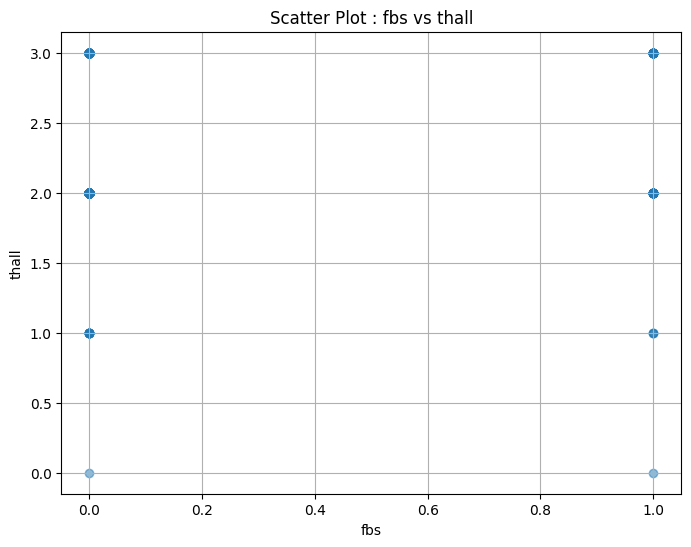

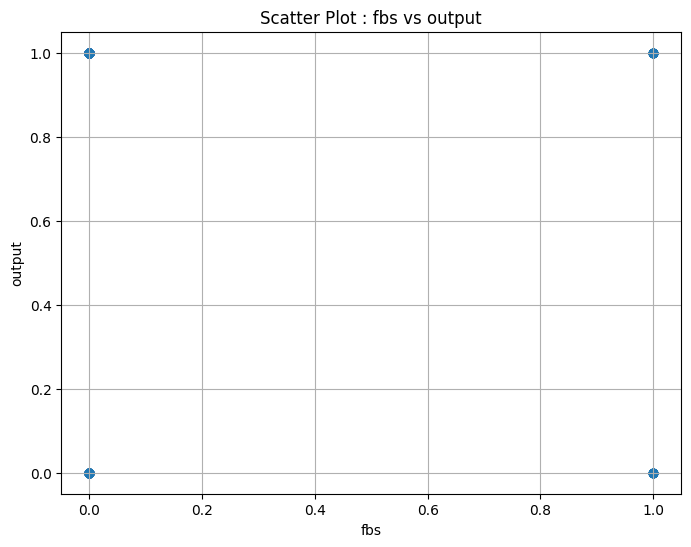

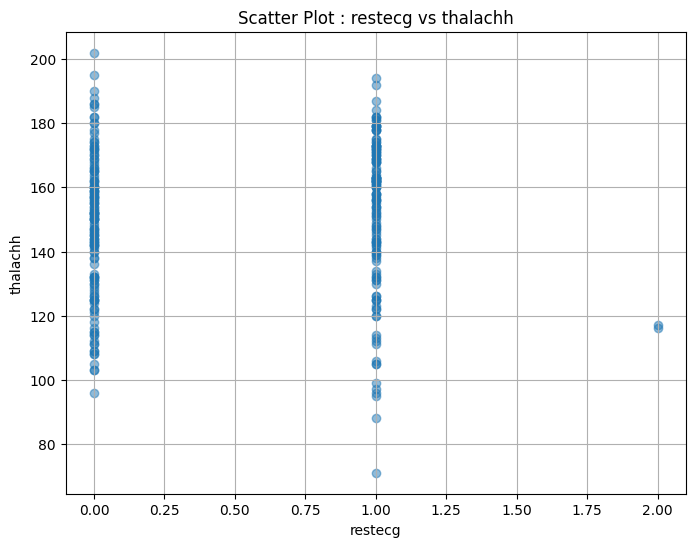

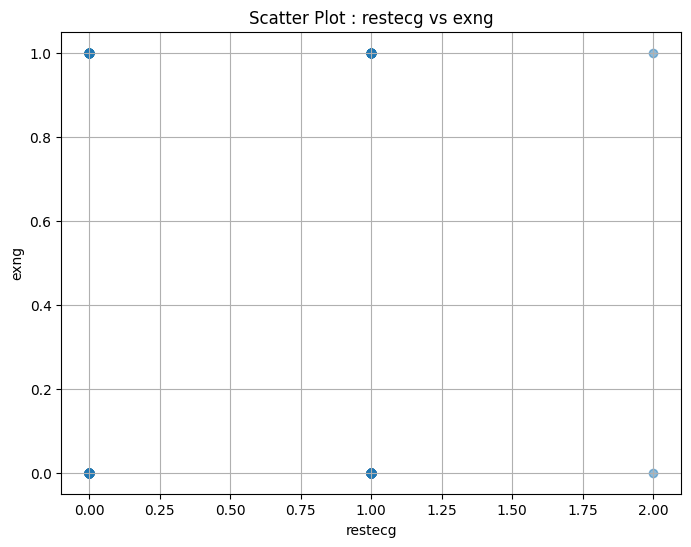

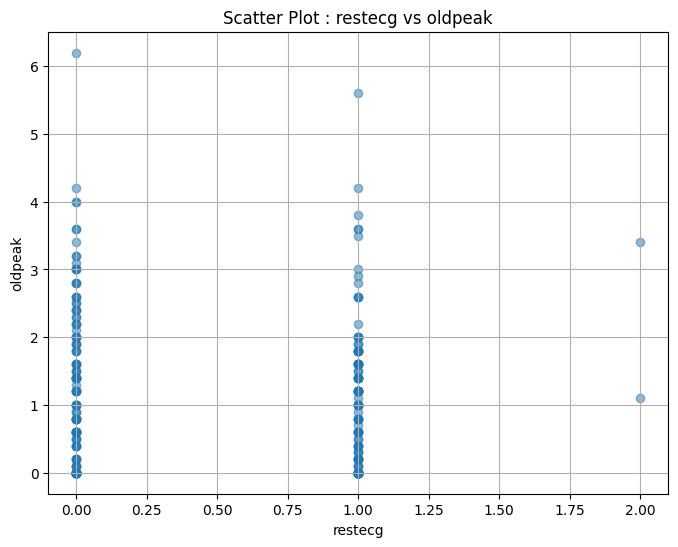

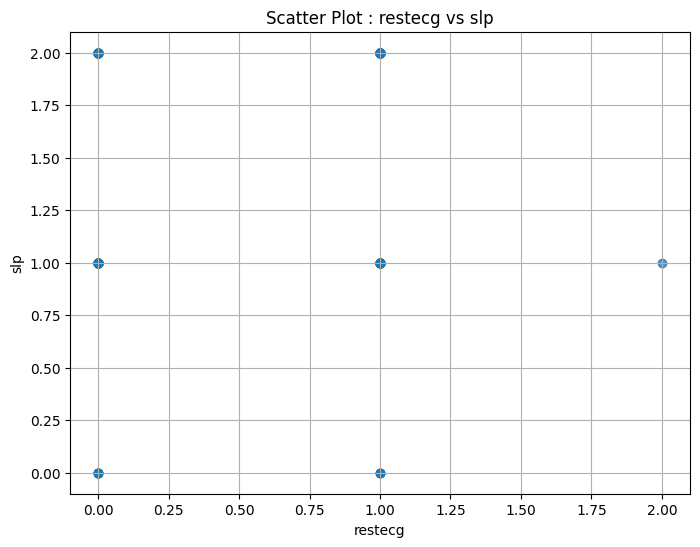

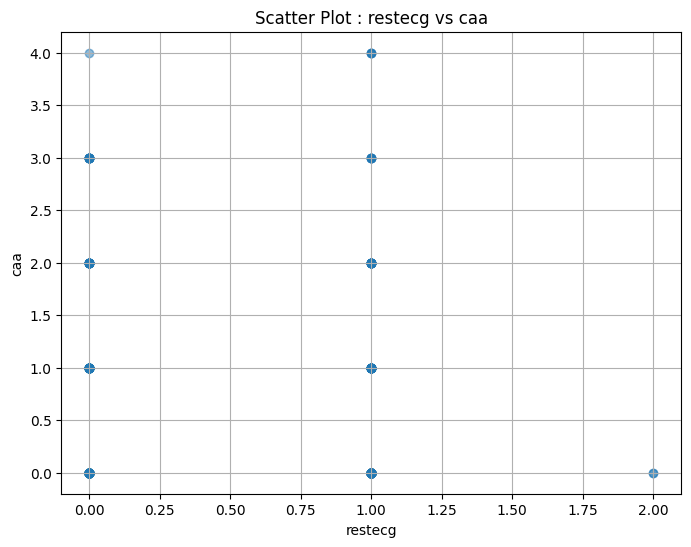

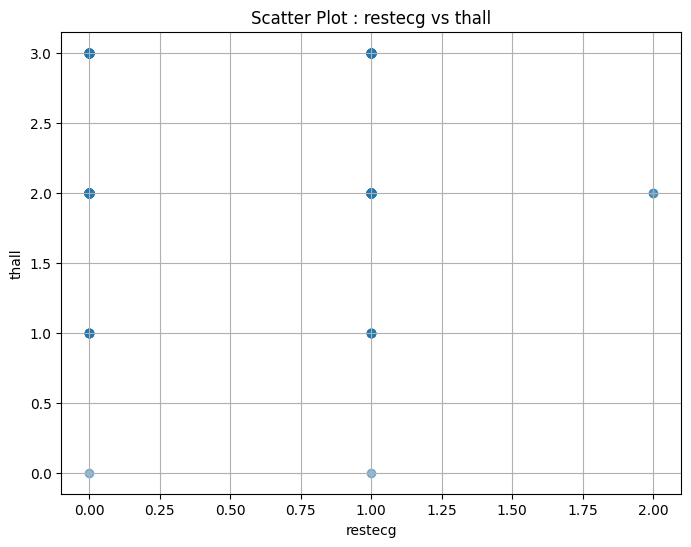

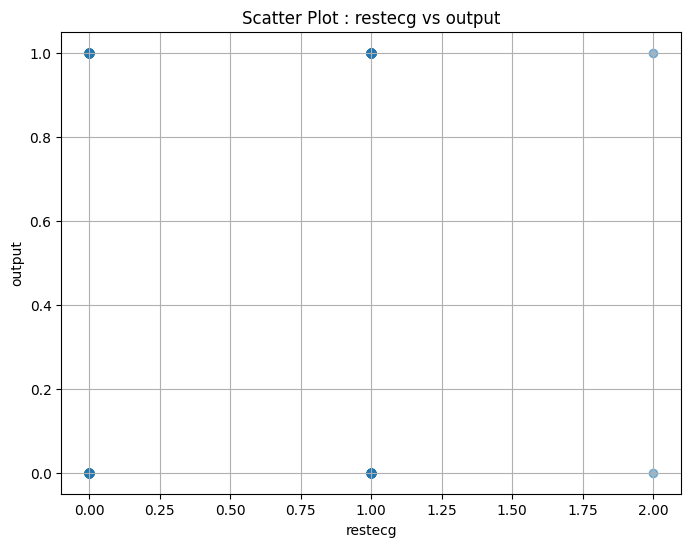

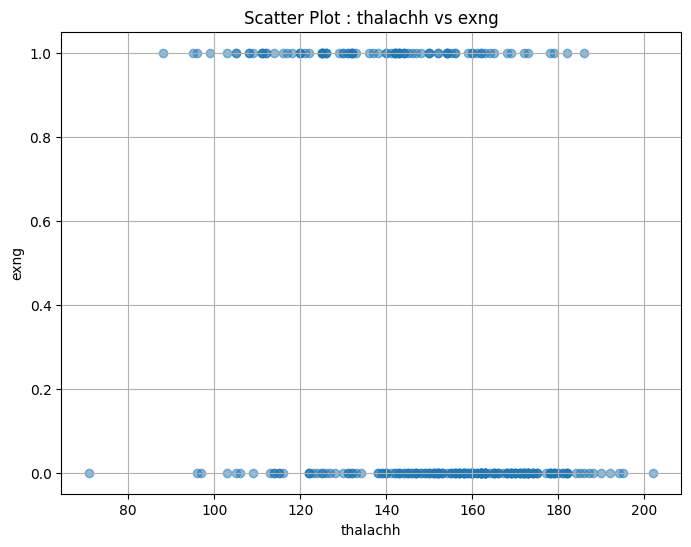

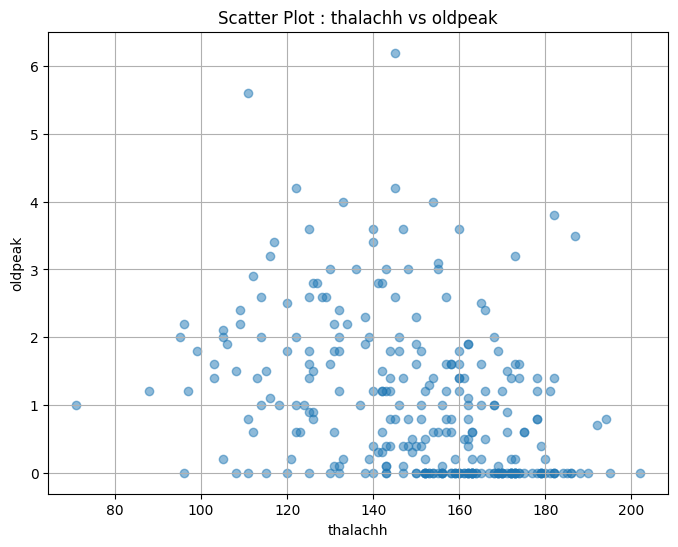

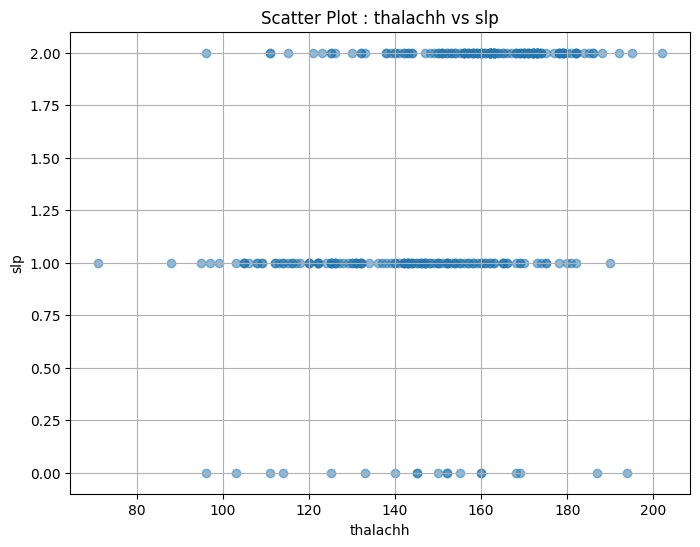

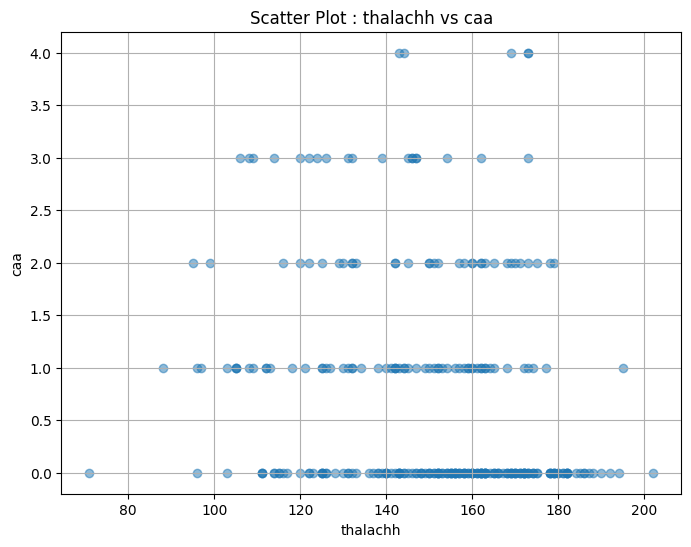

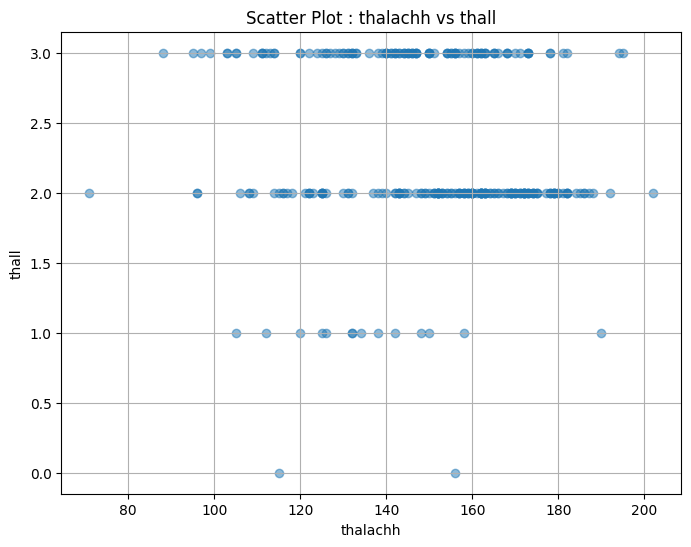

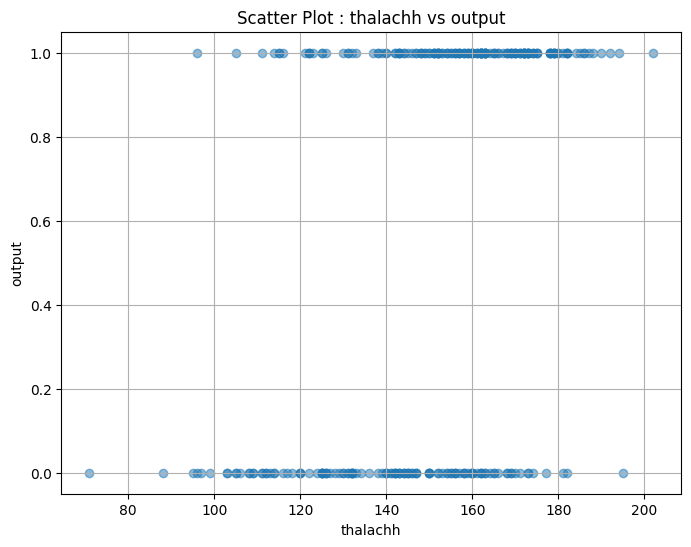

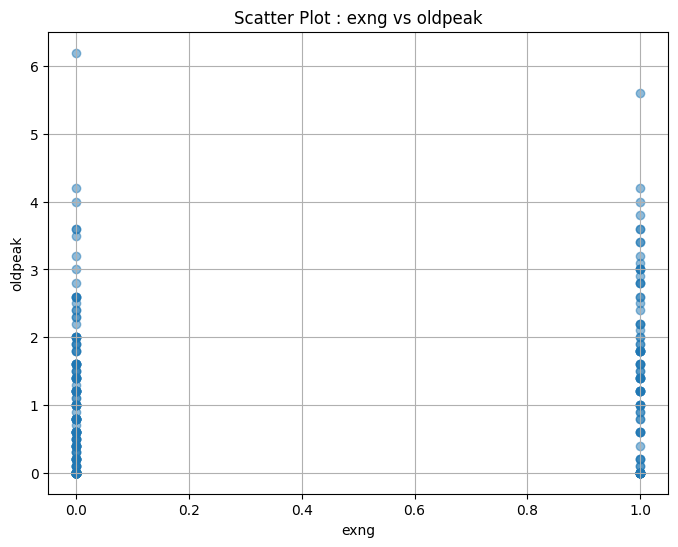

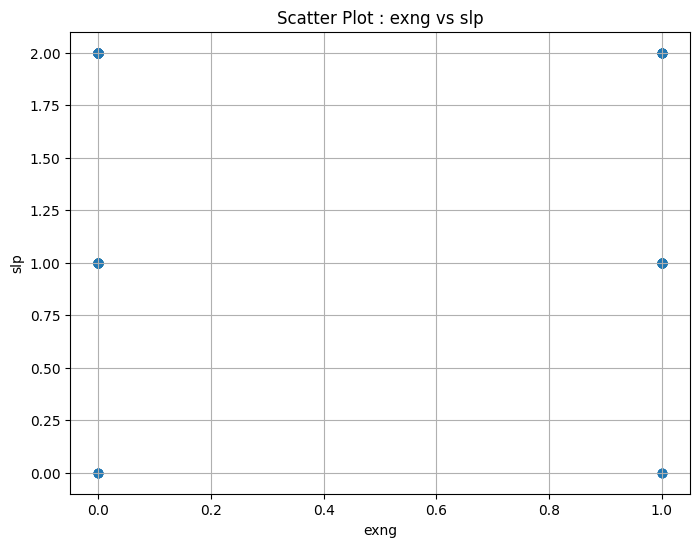

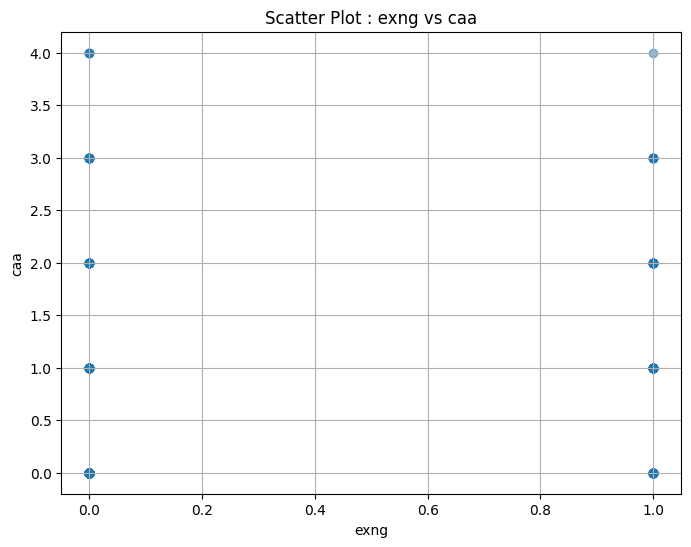

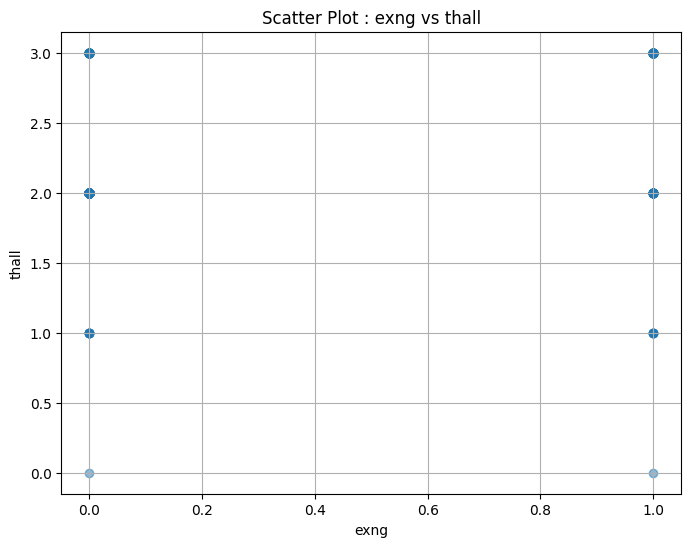

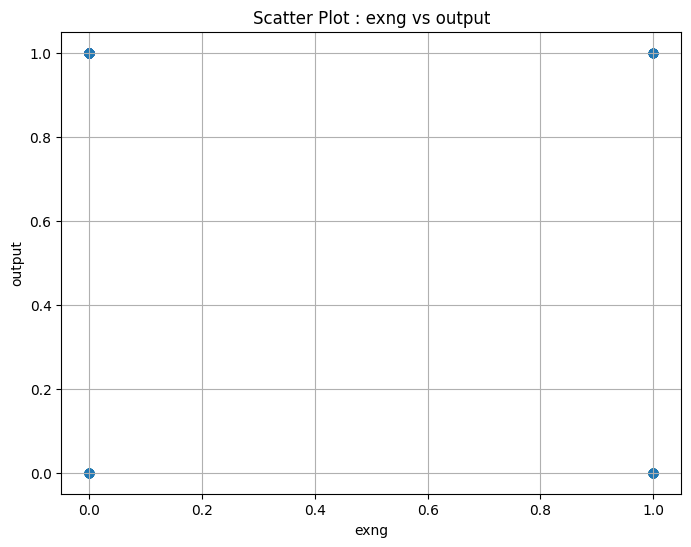

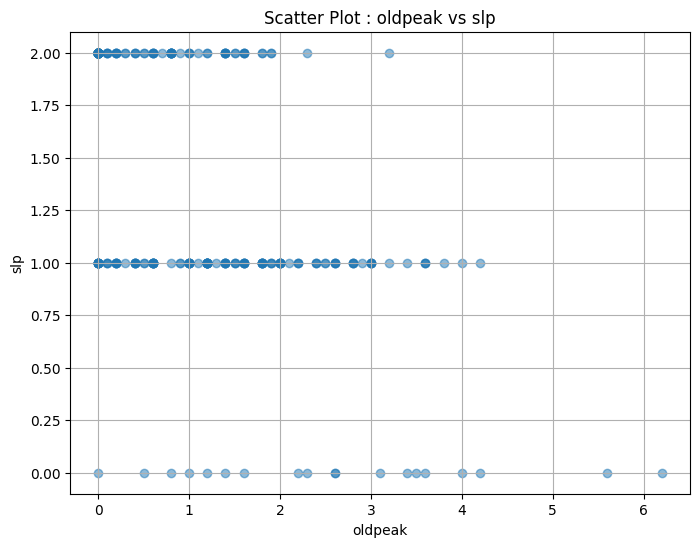

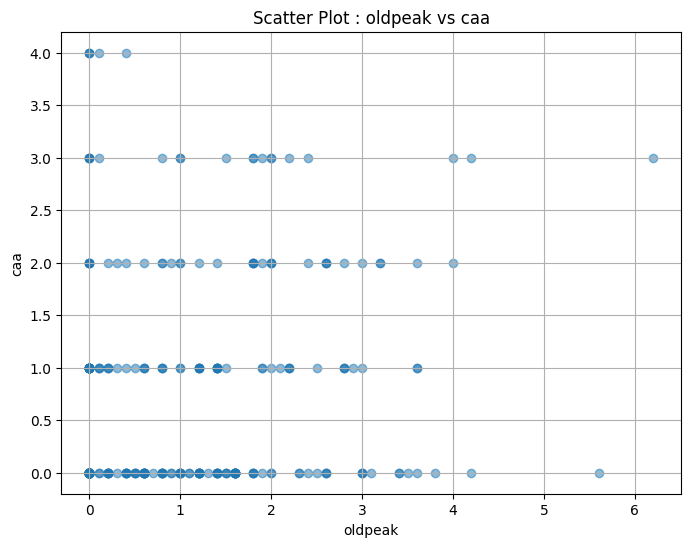

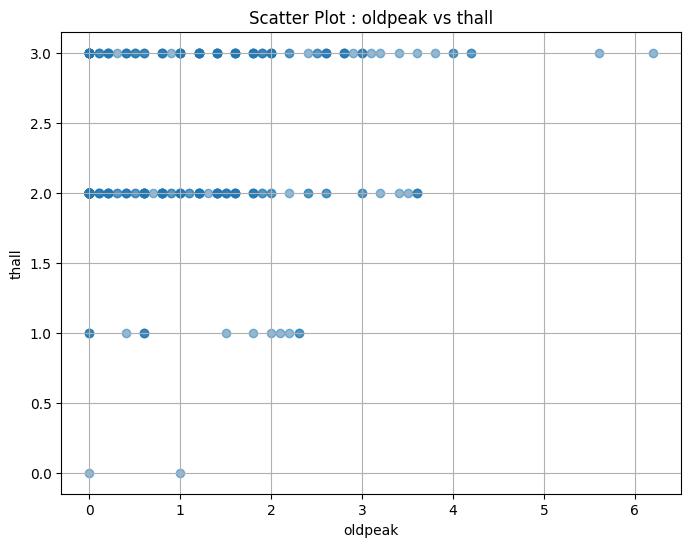

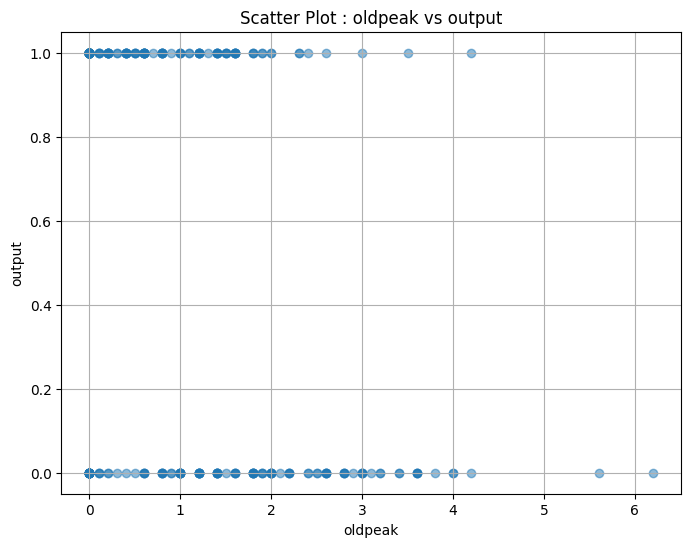

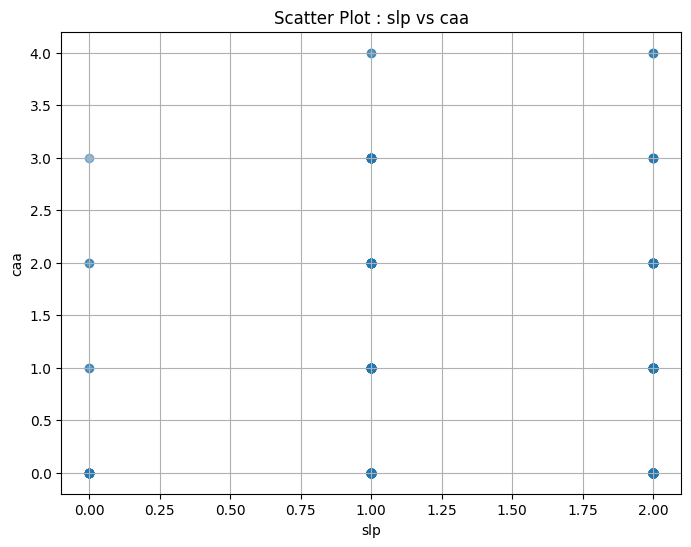

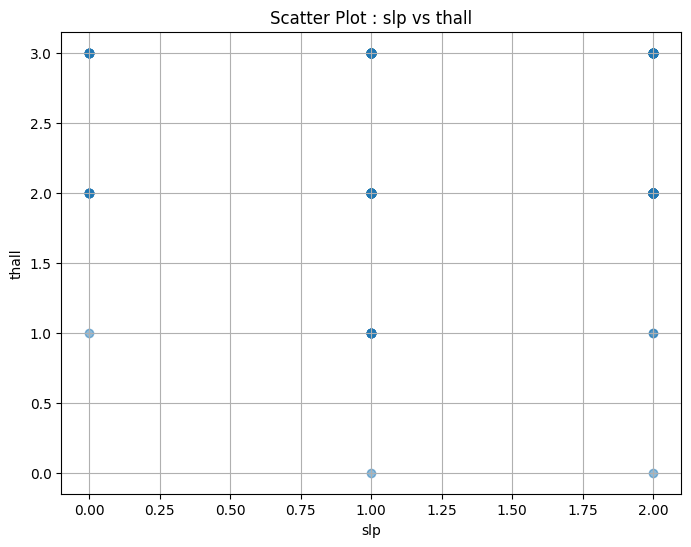

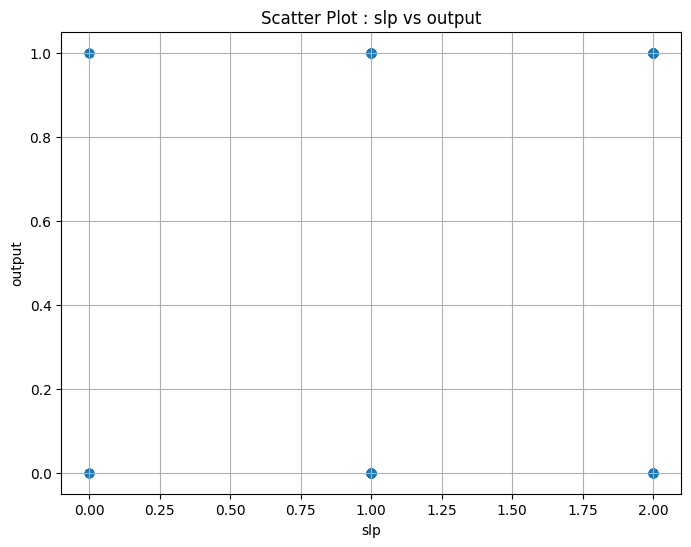

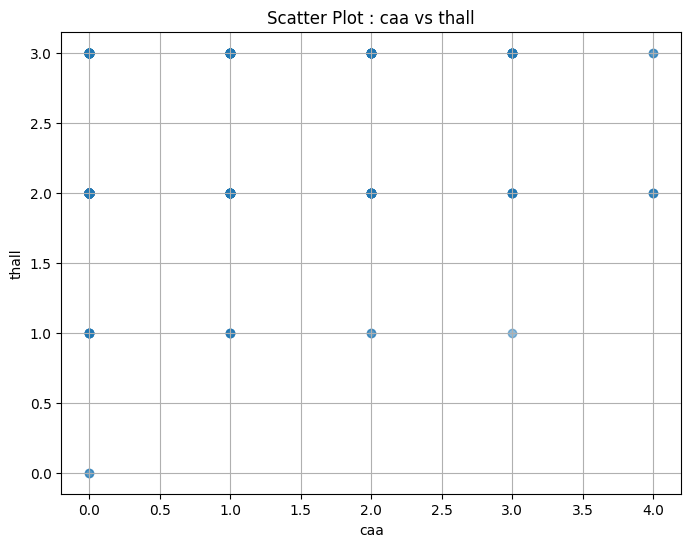

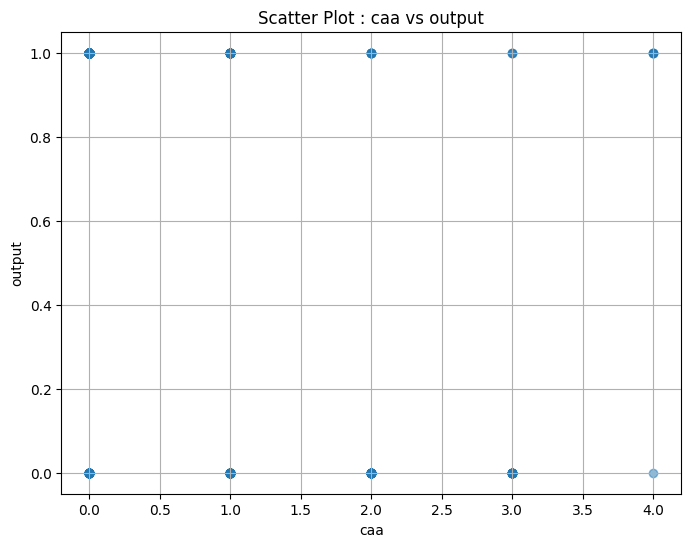

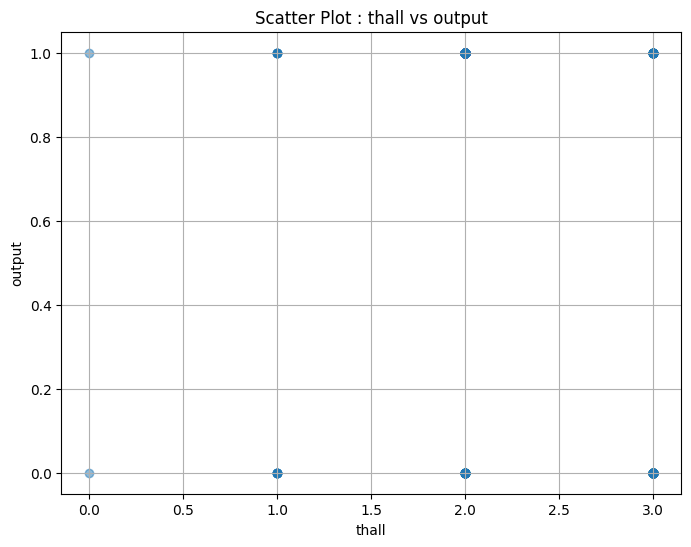

In [34]:
#🎯 Example usage:
#scatter_plot(data, "age", "output")  # Tracera 'age' vs 'output'
scatter_plot(data)  # Tracera toutes les combinaisons numériques


## 6️⃣ Statistiques Descriptives

### 6.1 Mode

In [116]:
# 📌 Fonction pour trouver le mode dans un dataset (toutes colonnes ou une colonne spécifique)
def manual_mode(data, column=None):
    """
    Calcule le(s) mode(s) d'une colonne donnée ou de tout le dataset.
    - Si `column` est spécifiée, retourne le mode pour cette colonne.
    - Si `column` n'est pas spécifiée, retourne le mode pour toutes les colonnes.

    Paramètres :
    - data : Dictionnaire contenant les données (similaire à un DataFrame pandas).
    - column : (optionnel) Nom de la colonne à analyser.

    Retourne :
    - Une liste contenant la ou les valeurs modales.
    - Un dictionnaire si aucune colonne spécifique n'est spécifiée.
    - Un message d'erreur si la colonne n'existe pas.
    """

    # Cas 1 : Si aucune colonne n'est spécifiée, appliquer la fonction à toutes les colonnes
    if column is None:
        return {col: manual_mode(data, col) for col in data}

    # Cas 2 : Vérifier si la colonne demandée existe dans le dataset
    if column not in data:
        return f"Error: Column '{column}' does not exist in the dataset."

    values = data[column]  # Récupération des valeurs de la colonne
    valid_values = []  # Initialisation de la liste des valeurs valides

    # Filtrer les valeurs invalides (None ou NaN)
    for val in values:
        if val is not None and val == val:  # Vérification pour exclure NaN
            valid_values += [val]  # Ajouter à la liste des valeurs valides

    # Si aucune valeur valide n'est trouvée, retourner None
    if not valid_values:
        return None

    # Initialisation du dictionnaire des fréquences
    freq = {}
    for val in valid_values:
        found = False  # Indicateur pour voir si la valeur est déjà dans le dictionnaire
        for key in freq:
            if key == val:  # Si la valeur existe déjà, incrémenter son compteur
                freq[key] += 1
                found = True
                break
        if not found:  # Si la valeur n'était pas encore enregistrée, l'ajouter avec une fréquence de 1
            freq[val] = 1

    # Trouver la fréquence maximale
    max_freq = -1  # Initialiser avec une valeur inférieure à toute fréquence possible
    for key in freq:
        if freq[key] > max_freq:  # Mettre à jour la fréquence maximale si nécessaire
            max_freq = freq[key]

    # Collecter toutes les valeurs ayant la fréquence maximale
    modes = []
    for key in freq:
        if freq[key] == max_freq:  # Ajouter les valeurs les plus fréquentes à la liste des modes
            modes += [key]

    return modes  # Retourner la liste des valeurs modales (peut contenir plusieurs valeurs)


In [118]:
# 🎯 Test de la fonction manual_mode pour trouver le mode dans le dataset
print(manual_mode(data))# Test de mode manuelle
print(data.mode())# Vérification avec pandas pour comparaison


{'age': [54.0], 'sex': [1.0], 'cp': [0.0], 'trtbps': [120.0], 'chol': [204.0, 234.0], 'fbs': [0.0], 'restecg': [1.0], 'thalachh': [162.0], 'exng': [0.0], 'oldpeak': [0.0], 'slp': [2.0], 'caa': [0.0], 'thall': [2.0], 'output': [1.0]}
    age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0  54.0  1.0  0.0   120.0  204.0  0.0      1.0     162.0   0.0      0.0  2.0   
1   NaN  NaN  NaN     NaN  234.0  NaN      NaN       NaN   NaN      NaN  NaN   

   caa  thall  output  
0  0.0    2.0     1.0  
1  NaN    NaN     NaN  


### 6.2 Moyenne

In [36]:
# 📌 Fonction pour trouver la moyenne  dans un dataset (toutes colonnes ou une colonne spécifique)
def manual_mean(data, column=None):
    # Cas 1 : Si aucune colonne spécifique n'est fournie, traiter toutes les colonnes du dataset
    if column is None:
        return {col: manual_mean(data, col) for col in data}  # Appel récursif pour chaque colonne

    # Cas 2 : Vérifier si la colonne demandée existe dans le dataset
    if column not in data:
        return f"Error: Column '{column}' does not exist in the dataset."  # Retourner un message d'erreur

    values = data[column]  # Récupérer les valeurs de la colonne spécifiée
    valid_values = []  # Liste pour stocker les valeurs valides (excluant None et NaN)

    # Filtrer les valeurs invalides (None ou NaN)
    for val in values:
        if val is not None and val == val:  # `val == val` permet d'exclure les NaN
            valid_values += [val]  # Ajouter la valeur à la liste des valeurs valides

    # Si la colonne ne contient que des valeurs invalides, retourner None
    if not valid_values:
        return None

    total_sum = 0  # Variable pour stocker la somme des valeurs
    count = 0  # Variable pour compter le nombre de valeurs valides

    # Calculer la somme et le nombre d'éléments manuellement
    for val in valid_values:
        total_sum += val  # Ajouter la valeur à la somme totale
        count += 1  # Incrémenter le compteur

    # Vérifier si count est zéro pour éviter une division par zéro
    if count == 0:
        return None  # Retourner None si aucune valeur valide n'est présente

    mean = total_sum / count  # Calcul de la moyenne : Somme / Nombre d'éléments

    return mean  # Retourner la moyenne calculée



In [37]:
# 🎯 Test de la fonction manual_mode pour trouver la moyenne
manual_mean(data)  # Test de moyenne manuelle
print(data.mean()) # Vérification avec pandas pour comparaison

age          54.010381
sex           0.678201
cp            1.020761
trtbps      131.377163
chol        247.961938
fbs           0.145329
restecg       0.515571
thalachh    150.231834
exng          0.318339
oldpeak       1.007612
slp           1.418685
caa           0.712803
thall         2.314879
output        0.570934
dtype: float64


### 6.3 Médiane

In [38]:
# 📌 Fonction pour calculer la médiane manuellement
def manual_median(data, column=None):
    """
    Calcule la médiane d'un dataset :
    - Si aucune colonne n'est spécifiée, retourne la médiane pour toutes les colonnes.
    - Sinon, retourne la médiane d'une colonne spécifique.

    Paramètres :
    - data : DataFrame pandas
    - column : (optionnel) Nom d'une colonne spécifique à analyser

    Retourne :
    - La médiane de la colonne spécifiée ou un dictionnaire de médianes pour toutes les colonnes.
    """

    # 🔹 Cas 1 : Calculer la médiane pour toutes les colonnes
    if column is None:
        return {col: manual_median(data, col) for col in data}

    # 🔹 Vérifier si la colonne existe
    if column not in data:
        return f" Erreur : La colonne '{column}' n'existe pas dans le dataset."

    # 🔹 Trier les valeurs de la colonne
    values = sorted(data[column])

    # 🔹 Calculer le nombre d'éléments
    n = manual_len(values)

    # 🔹 Vérifier si le nombre d'éléments est impair ou pair pour retourner la médiane
    if n % 2 == 1:
        return values[n // 2]  # Nombre impair -> élément du milieu
    else:
        return (values[n // 2 - 1] + values[n // 2]) / 2  # Nombre pair -> moyenne des deux valeurs centrales




In [39]:
# 🎯 Test de la fonction manual_median
print(manual_median(data))  # Test de la médiane manuelle
print(data.median())  # Vérification avec pandas pour comparaison

{'age': 54, 'sex': 1, 'cp': 1, 'trtbps': 130, 'chol': 243, 'fbs': 0, 'restecg': 1, 'thalachh': 154, 'exng': 0, 'oldpeak': 0.6, 'slp': 1, 'caa': 0, 'thall': 2, 'output': 1}
age          54.0
sex           1.0
cp            1.0
trtbps      130.0
chol        243.0
fbs           0.0
restecg       1.0
thalachh    154.0
exng          0.0
oldpeak       0.6
slp           1.0
caa           0.0
thall         2.0
output        1.0
dtype: float64


## 7️⃣ Gestion des Valeurs Manquantes

### 7.1 Identification des valeurs manquantes

In [119]:
# 📌 Fonction pour trouver les valeurs manquantes, invalides et non numériques
def find_missing_and_invalid_values(data, column=None):
    """
    Cette fonction détecte :
    - Les valeurs manquantes (None ou NaN)
    - Les valeurs invalides (vides ou contenant uniquement des caractères spéciaux)
    - Les valeurs non numériques (et leurs positions)

    Arguments :
    - data : Dictionnaire contenant les données.
    - column : (Optionnel) Nom d'une colonne spécifique à analyser.

    Retourne un dictionnaire contenant :
    - "missing_values" : Liste des valeurs manquantes (colonne, index).
    - "invalid_values" : Liste des valeurs invalides (colonne, index, valeur).
    - "non_numeric_values" : Liste des valeurs non numériques (colonne, index, valeur).
    """

    missing_values = []  # Liste pour stocker les valeurs manquantes
    invalid_values = []  # Liste pour stocker les valeurs invalides
    non_numeric_values = []  # Liste pour stocker les valeurs non numériques

    # Vérifier si une colonne spécifique est demandée
    if column:
        if column not in data:  # Vérifier si la colonne existe dans le dataset
            return f"Error: Column '{column}' does not exist in the dataset."
        columns_to_check = {column: data[column]}  # Vérifier uniquement cette colonne
    else:
        columns_to_check = data  # Vérifier toutes les colonnes si aucune n'est spécifiée

    # Parcourir les colonnes sélectionnées
    for col in columns_to_check:
        for i, val in enumerate(columns_to_check[col]):  # Itérer sur les valeurs de la colonne

            # Vérifier si la valeur est manquante (None ou NaN)
            if val is None or val != val:  # NaN n'est pas égal à lui-même en Python
                missing_values.append((col, i))  # Ajouter l'index et la colonne à la liste des valeurs manquantes

            # Vérifier si la valeur est invalide
            elif is_invalid_value(val):  # Vérifie si la valeur est vide ou contient uniquement des caractères spéciaux
                invalid_values.append((col, i, val))  # Ajouter la valeur invalide avec son index et colonne

            # Vérifier si la valeur est non numérique
            elif not is_numeric(val):  # Vérifie si la valeur n'est pas un nombre
                non_numeric_values.append((col, i, val))  # Ajouter la valeur non numérique avec son index et colonne

    # Création du dictionnaire des résultats
    result = {}  # Initialiser un dictionnaire pour stocker les résultats

    # Vérifier si des valeurs manquantes ont été trouvées
    if missing_values:
        result["missing_values"] = missing_values  # Ajouter les valeurs manquantes au dictionnaire
    else:
        result["missing_values"] = "No missing values found."  # Message si aucune valeur manquante

    # Vérifier si des valeurs invalides ont été trouvées
    if invalid_values:
        result["invalid_values"] = invalid_values  # Ajouter les valeurs invalides au dictionnaire
    else:
        result["invalid_values"] = "No invalid values found."  # Message si aucune valeur invalide

    # Vérifier si des valeurs non numériques ont été trouvées
    if non_numeric_values:
        result["non_numeric_values"] = non_numeric_values  # Ajouter les valeurs non numériques au dictionnaire
    else:
        result["non_numeric_values"] = "All values are numeric."  # Message si toutes les valeurs sont numériques

    return result  # Retourner le dictionnaire des résultats


In [120]:
# 🎯 Execution  de la fonction  pour trouver les valeurs manquantes et les valeurs invalides dans le dataset
print(find_missing_and_invalid_values(data))

{'missing_values': 'No missing values found.', 'invalid_values': 'No invalid values found.', 'non_numeric_values': 'All values are numeric.'}


In [121]:
# ✅ Exemple de dataset avec des valeurs manquantes et invalides
d= {
    "A": [1, 2, None, 4, 5, float('nan'), 7, 8, 9, 10],  # Contains None and NaN
    "B": ["5", "text", "!", 8, 9, "", "3", "?", 7, 2],  # Contains non-numeric and special characters
    "C": [100, 200, 300, 400, None, 600, 700, 800,float('nan'), 1000],  # Contains None and NaN
    "D": ["@", "#", "$", "%", "^", "&", "*", "(", ")", "_"],  # Only special characters (invalid)
}
find_missing_and_invalid_values(d)

{'missing_values': [('A', 2), ('A', 5), ('C', 4), ('C', 8)],
 'invalid_values': [('B', 2, '!'),
  ('B', 5, ''),
  ('B', 7, '?'),
  ('D', 0, '@'),
  ('D', 1, '#'),
  ('D', 2, '$'),
  ('D', 3, '%'),
  ('D', 4, '^'),
  ('D', 5, '&'),
  ('D', 6, '*'),
  ('D', 7, '('),
  ('D', 8, ')')],
 'non_numeric_values': [('B', 1, 'text'), ('D', 9, '_')]}

### 7.2 Traitement des valeurs manquantes

In [145]:
# 📌 Fonction pour remplacer les valeurs manquantes, invalides et non numériques
def replace_missing_or_invalid(data, strategy="mean", column=None):
    """
    Gère les valeurs manquantes, invalides et non numériques dans un ensemble de données.

    Paramètres :
        data (dict) : Dataset où les colonnes sont des clés du dictionnaire.
        strategy (str) : "mean", "median", "mode" pour remplacer les valeurs, ou "remove" pour supprimer les lignes.
        column (str ou None) : Colonne spécifique à traiter. Si None, s'applique à toutes les colonnes.

    Retourne :
        dict ou str : Dataset nettoyé ou message si aucun problème n'est détecté.
    """

    missing_invalid_values = find_missing_and_invalid_values(data, column)  # Détecter les valeurs problématiques

    # Sélectionner les colonnes à traiter
    if column:
        if column not in data:  # Vérifier si la colonne existe
            return f"Error: Column '{column}' does not exist in the dataset."
        columns_to_process = {column: data[column]}  # Ne traiter que cette colonne
    else:
        columns_to_process = data  # Traiter toutes les colonnes

    # Vérifier si des valeurs manquantes, invalides ou non numériques existent
    no_issues = all(
        missing_invalid_values[key] in ["No missing values found.", "No invalid values found.", "All values are numeric."]
        or not missing_invalid_values[key]  # Vérifier si les listes sont vides
        for key in ["missing_values", "invalid_values", "non_numeric_values"]
    )

    if no_issues:  # Si aucun problème n'est détecté
        return "No missing, invalid, or non-numeric values found."

    if strategy == "remove":
        # Collecter les index des lignes à supprimer
        rows_to_remove = set()  # Utilisation d'un set pour éviter les doublons
        for key in ["missing_values", "invalid_values", "non_numeric_values"]:
            if isinstance(missing_invalid_values[key], list):  # Vérifier si la clé contient une liste
                for col, index, _ in missing_invalid_values[key]:  # Récupérer l'index des valeurs problématiques
                    if col in columns_to_process:
                        rows_to_remove.add(index)  # Ajouter l'index des lignes à supprimer

        # Supprimer les lignes affectées en recréant les listes de valeurs sans les indices problématiques
        data = {col: [val for i, val in enumerate(values) if i not in rows_to_remove] for col, values in data.items()}

    else:
        # Remplacement des valeurs manquantes, invalides et non numériques selon la stratégie choisie
        for col in columns_to_process:
            # Extraire les valeurs numériques valides
            valid_values = [x for x in data[col] if isinstance(x, (int, float)) and not (x is None or x != x)]  # Exclure None et NaN

            if not valid_values:  # Si aucune valeur numérique valide n'est trouvée, ignorer la colonne
                continue

            # Déterminer la valeur de remplacement selon la stratégie
            if strategy == "mean":
                replacement_value = manual_mean({"temp_col": valid_values}, "temp_col")  # Moyenne des valeurs valides
            elif strategy == "median":
                replacement_value = manual_median({"temp_col": valid_values}, "temp_col")  # Médiane des valeurs valides
            elif strategy == "mode":
                replacement_value = manual_mode({"temp_col": valid_values}, "temp_col")  # Mode des valeurs valides
            else:
                continue  # Ignorer si la stratégie est inconnue

            # Appliquer la valeur de remplacement aux valeurs problématiques
            for i in range(manual_len(data[col])):  # Parcourir les indices de la colonne
                if (
                    data[col][i] is None or  # Vérifier si la valeur est None
                    data[col][i] != data[col][i] or  # Vérifier si la valeur est NaN
                    not isinstance(data[col][i], (int, float))  # Vérifier si la valeur n'est pas numérique
                ):
                    data[col][i] = replacement_value  # Remplacer la valeur problématique

    return data  # Retourner le dataset nettoyé


In [124]:
# 🎯 Execution  de la fonction  pour remplacer les valeurs manquantes et les valeurs invalides dans le dataset
replace_missing_or_invalid(data,strategy= "mean")

'No missing, invalid, or non-numeric values found.'

In [125]:
# ✅ Exemple de dataset avec des valeurs manquantes et invalides
d= {
    "A": [1, 2, None, 4, 5, float('nan'), 7, 8, 9, 10],  # Contains None and NaN
    "B": ["5", "text", "!", 8, 9, "", "3", "?", 7, 2],  # Contains non-numeric and special characters
    "C": [100, 200, 300, 400, None, 600, 700, 800,float('nan'), 1000],  # Contains None and NaN
    "D": [1,5,8,"@", "#", "$", "%", "^", "&", "*", "(", ")", 10,"_"],  # Only special characters (invalid)
}



In [126]:
replace_missing_or_invalid(d,strategy= "mean")


{'A': [1, 2, 5.75, 4, 5, 5.75, 7, 8, 9, 10],
 'B': [6.5, 6.5, 6.5, 8, 9, 6.5, 6.5, 6.5, 7, 2],
 'C': [100, 200, 300, 400, 512.5, 600, 700, 800, 512.5, 1000],
 'D': [1, 5, 8, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10, 6.0]}

## 8️⃣ Normalisation des Données


####Normalization Methods for Each Attribute and Justification
To optimize our machine learning model, we need to apply appropriate normalization techniques based on the nature of each attribute. The two main methods are:

* Min-Max Scaling: Scales values between 0 and 1, suitable for categorical or bounded numerical data.
* Z-Score Standardization: Centers values around mean = 0 and standard deviation = 1, ideal for continuous variables with no fixed range.
Chosen Normalization Methods for Each Attribute
1. ✅ Min-Max Scaling (For categorical/bounded numerical attributes):

* cp (chest pain type) → Has discrete values in a fixed range.
restecg (resting ECG results) → Categorical with limited values.
* slp (slope of the peak exercise ST segment) → Discrete values within a fixed range.
* caa (number of major vessels colored by fluoroscopy) → Limited set of values.
thall (thalassemia type) → Categorical with predefined values.
2. ✅ Z-Score Standardization (For continuous attributes with no fixed range):

* age → Continuous without fixed limits.
* trtbps (resting blood pressure) → No predefined range, may have outliers.
* chol (cholesterol level) → Wide range of values, normal distribution likely.
* thalachh (maximum heart rate achieved) → Varies greatly between individuals.
* oldpeak (ST depression induced by exercise) → Continuous and unbounded.
3. ❌ No Normalization Needed (For binary attributes already in [0,1] range):

* sex (gender) → Binary (0 or 1).
* fbs (fasting blood sugar) → Binary (0 or 1).
* exng (exercise-induced angina) → Binary (0 or 1).
* output (presence of heart disease) → Binary classification label.

### 8.1 Normalisation Min-Max

In [141]:
# 📌 Fonction pour normaliser par min-max methode
def min_max_normalization(data, column=None):
    """
    Applique la normalisation Min-Max sur une colonne ou l'ensemble du dataset.

    Paramètres :
        data (dict) : Dataset sous forme de dictionnaire (colonnes comme clés).
        column (str ou None) : Colonne spécifique à normaliser. Si None, s'applique à toutes les colonnes numériques.

    Retourne :
        dict, list ou str : Dataset normalisé, liste de valeurs normalisées pour une colonne, ou un message d'erreur.
    """

    # Vérifier la présence de valeurs problématiques (valeurs manquantes ou invalides)
    issues = find_missing_and_invalid_values(data, column)

    # Vérifier si des valeurs manquantes existent dans la colonne ou le dataset
    if isinstance(issues["missing_values"], list) and issues["missing_values"]:
        return f"Error: Missing values detected in '{column or 'dataset'}'. Handle them before normalization."  # Retourner un message d'erreur

    # Vérifier si des valeurs invalides existent dans la colonne ou le dataset
    if isinstance(issues["invalid_values"], list) and issues["invalid_values"]:
        return f"Error: Invalid values detected in '{column or 'dataset'}'. Handle them before normalization."  # Retourner un message d'erreur

    # Copier les données d'origine pour éviter toute modification involontaire du dataset original
    normalized_data = data.copy()

    # Si aucune colonne spécifique n'est indiquée, appliquer la normalisation sur toutes les colonnes numériques
    if column is None:
        return {
            col: min_max_normalization(data, col)  # Appel récursif pour normaliser chaque colonne
            for col in data  # Boucle sur chaque colonne du dataset
            if all(is_numeric(v) for v in data[col] if not is_invalid_value(v))  # Vérifie que la colonne contient uniquement des valeurs numériques valides
        }

    # Vérifier si la colonne demandée existe dans le dataset
    if column not in data:
        return f"Error: Column '{column}' does not exist in the dataset."  # Retourner une erreur si la colonne n'existe pas

    # Extraire uniquement les valeurs numériques valides de la colonne
    valid_values = [v for v in data[column] if is_numeric(v)]

    # Vérifier s'il y a au moins une valeur numérique valide dans la colonne
    if not valid_values:
        return f"Error: No valid numeric data in column '{column}'."  # Retourner une erreur si aucune valeur valide n'est trouvée

    # Trouver la valeur minimale dans la colonne
    min_value = min(valid_values)

    # Trouver la valeur maximale dans la colonne
    max_value = max(valid_values)

    # Vérifier si toutes les valeurs sont identiques (impossible de normaliser)
    if min_value == max_value:
        return f"Error: Cannot normalize '{column}', min and max are the same."  # Retourner une erreur

    # Appliquer la normalisation Min-Max sur chaque valeur de la colonne
    normalized_data[column] = [
        (val - min_value) / (max_value - min_value) if is_numeric(val) else None  # Calcul de la normalisation uniquement pour les valeurs numériques
        for val in data[column]  # Boucle sur chaque valeur de la colonne
    ]

    # Retourner la colonne normalisée
    return normalized_data[column]


In [142]:
# ✅ Exemple de dataset avec des valeurs manquantes et invalides
d= {
    "A": [1, 2, None, 4, 5, float('nan'), 7, 8, 9, 10],  # Contains None and NaN
    "B": ["5", "text", "!", 8, 9, "", "3", "?", 7, 2],  # Contains non-numeric and special characters
    "C": [100, 200, 300, 400, None, 600, 700, 800,float('nan'), 1000],  # Contains None and NaN
    "D": ["@", "#", "$", "%", "^", "&", "*", "(", ")", "_"],  # Only special characters (invalid)
}

min_max_normalization(d.copy())

"Error: Missing values detected in 'dataset'. Handle them before normalization."

In [146]:
# 🎯 Execution  de la fonction  pour normaliser
print("Min-Max Normalized Data:\n")
min_max_normalized_data = pd.DataFrame(min_max_normalization(data.copy()))
min_max_normalized_data.head(-1)


Min-Max Normalized Data:



age       sex        cp    trtbps      chol       fbs   restecg  \
0    0.521050  0.678201  0.340254  0.352615  0.278452  0.145329  0.257785   
1    0.125000  1.000000  0.666667  0.339623  0.283105  0.000000  0.500000   
2    0.250000  0.000000  0.333333  0.339623  0.178082  0.000000  0.000000   
3    0.541667  1.000000  0.333333  0.245283  0.251142  0.000000  0.500000   
4    0.562500  0.000000  0.000000  0.245283  0.520548  0.000000  0.500000   
..        ...       ...       ...       ...       ...       ...       ...   
283  0.229167  1.000000  0.000000  0.547170  0.221461  0.000000  0.500000   
284  0.645833  1.000000  0.000000  0.433962  0.184932  0.000000  0.000000   
285  0.354167  1.000000  0.000000  0.433962  0.422374  0.000000  0.500000   
286  0.625000  1.000000  1.000000  0.377358  0.178082  0.000000  0.500000   
287  0.520833  1.000000  0.333333  0.566038  0.242009  0.000000  0.000000   

     thalachh      exng   oldpeak       slp       caa     thall    output  
0    0.604823  0.318339  0.370968  0.709343  0.178201  0.771626  0.570934  
1    0.885496  0.000000  0.564516  0.000000  0.000000  0.666667  1.000000  
2    0.770992  0.000000  0.225806  1.000000  0.000000  0.666667  1.000000  
3    0.816794  0.000000  0.129032  1.000000  0.000000  0.666667  1.000000  
4    0.702290  1.000000  0.096774  1.000000  0.000000  0.666667  1.000000  
..        ...       ...       ...       ...       ...       ...       ...  
283  0.839695  0.000000  0.000000  1.000000  0.000000  1.000000  0.000000  
284  0.511450  1.000000  0.306452  1.000000  0.250000  1.000000  0.000000  
285  0.374046  1.000000  0.290323  0.500000  0.500000  1.000000  0.000000  
286  0.694656  0.000000  0.129032  1.000000  0.500000  0.666667  0.000000  
287  0.709924  0.000000  0.000000  1.000000  0.250000  0.666667  0.000000  

[288 rows x 14 columns]

In [144]:
# 🆚 Comparaison par methode exacte
min_max_normalized_data = (data - data.min()) / (data.max() - data.min())
min_max_normalized_data.head(-1)

age       sex        cp    trtbps      chol       fbs   restecg  \
0    0.521050  0.678201  0.340254  0.352615  0.278452  0.145329  0.257785   
1    0.125000  1.000000  0.666667  0.339623  0.283105  0.000000  0.500000   
2    0.250000  0.000000  0.333333  0.339623  0.178082  0.000000  0.000000   
3    0.541667  1.000000  0.333333  0.245283  0.251142  0.000000  0.500000   
4    0.562500  0.000000  0.000000  0.245283  0.520548  0.000000  0.500000   
..        ...       ...       ...       ...       ...       ...       ...   
283  0.229167  1.000000  0.000000  0.547170  0.221461  0.000000  0.500000   
284  0.645833  1.000000  0.000000  0.433962  0.184932  0.000000  0.000000   
285  0.354167  1.000000  0.000000  0.433962  0.422374  0.000000  0.500000   
286  0.625000  1.000000  1.000000  0.377358  0.178082  0.000000  0.500000   
287  0.520833  1.000000  0.333333  0.566038  0.242009  0.000000  0.000000   

     thalachh      exng   oldpeak       slp       caa     thall    output  
0    0.604823  0.318339  0.370968  0.709343  0.178201  0.771626  0.570934  
1    0.885496  0.000000  0.564516  0.000000  0.000000  0.666667  1.000000  
2    0.770992  0.000000  0.225806  1.000000  0.000000  0.666667  1.000000  
3    0.816794  0.000000  0.129032  1.000000  0.000000  0.666667  1.000000  
4    0.702290  1.000000  0.096774  1.000000  0.000000  0.666667  1.000000  
..        ...       ...       ...       ...       ...       ...       ...  
283  0.839695  0.000000  0.000000  1.000000  0.000000  1.000000  0.000000  
284  0.511450  1.000000  0.306452  1.000000  0.250000  1.000000  0.000000  
285  0.374046  1.000000  0.290323  0.500000  0.500000  1.000000  0.000000  
286  0.694656  0.000000  0.129032  1.000000  0.500000  0.666667  0.000000  
287  0.709924  0.000000  0.000000  1.000000  0.250000  0.666667  0.000000  

[288 rows x 14 columns]

### 8.2 Normalisation Z-score (Standardisation)

In [168]:
# 📌 Fonction pour normaliser par z-score methode
def z_score_normalization(data, column=None):
    """
    Applique la normalisation Z-score (standardisation) sur une colonne ou tout le dataset.

    Paramètres :
        data (dict) : Dataset sous forme de dictionnaire (colonnes comme clés).
        column (str ou None) : Colonne spécifique à normaliser. Si None, s'applique à toutes les colonnes numériques.

    Retourne :
        dict, list ou str : Dataset normalisé, liste de valeurs normalisées pour une colonne, ou un message d'erreur.
    """

    # Vérifier la présence de valeurs manquantes ou invalides
    issues = find_missing_and_invalid_values(data, column)

    # Vérifier s'il y a des valeurs manquantes
    if isinstance(issues["missing_values"], list) and issues["missing_values"]:
        return f"Error: Missing values detected in '{column or 'dataset'}'. Handle them before normalization."

    # Vérifier s'il y a des valeurs invalides
    if isinstance(issues["invalid_values"], list) and issues["invalid_values"]:
        return f"Error: Invalid values detected in '{column or 'dataset'}'. Handle them before normalization."

    # Initialisation d'un dictionnaire pour stocker les données normalisées
    normalized_data = {}

    if column is None:
        # Si aucune colonne spécifique n'est donnée, normaliser toutes les colonnes numériques
        return {
            col: z_score_normalization(data, col)
            for col in data
            if all(is_numeric(v) for v in data[col] if not is_invalid_value(v))
        }

    # Vérifier si la colonne existe dans les données
    if column not in data:
        return f"Error: Column '{column}' does not exist in the dataset."

    # Vérifier que la colonne contient uniquement des valeurs numériques valides
    valid_values = [v for v in data[column] if is_numeric(v)]
    if not valid_values:
        return f"Error: No valid numeric data in column '{column}'."

    # Calculer la moyenne des valeurs valides
    mean_value = sum(valid_values) / len(valid_values)

    # Calculer l'écart-type des valeurs valides
    std_dev = (sum((v - mean_value) ** 2 for v in valid_values) / (len(valid_values)-1)) ** 0.5

    # Vérifier si l'écart-type est nul (toutes les valeurs sont identiques)
    if std_dev == 0:
        return f"Error: Cannot normalize '{column}', standard deviation is zero."

    # Appliquer la normalisation Z-score sur la colonne
    normalized_data[column] = [
        (val - mean_value) / std_dev if is_numeric(val) else None
        for val in data[column]
    ]

    return normalized_data[column]  # Retourner la colonne normalisée


In [169]:
# ✅ Exemple de dataset avec des valeurs manquantes et invalides
z_score_normalization(d.copy())

"Error: Missing values detected in 'dataset'. Handle them before normalization."

In [170]:
# 🎯 Execution  de la fonction  pour normaliser
print("Z-score Normalized Data:")
pd.DataFrame(z_score_normalization(data.copy())).head(-1)

Z-score Normalized Data:


age       sex        cp    trtbps      chol       fbs   restecg  \
0    0.002271  0.002381  0.006711  0.002694 -0.001004  0.008464 -0.003475   
1   -2.080951  0.690588  0.966254 -0.076002  0.038502 -0.407450  0.940081   
2   -1.423451 -1.448032 -0.013633 -0.076002 -0.853167 -0.407450 -1.007688   
3    0.110717  0.690588 -0.013633 -0.647431 -0.232875 -0.407450  0.940081   
4    0.220300 -1.448032 -0.993519 -0.647431  2.054450 -0.407450  0.940081   
..        ...       ...       ...       ...       ...       ...       ...   
283 -1.533034  0.690588 -0.993519  1.181144 -0.484868 -0.407450  0.940081   
284  0.658634  0.690588 -0.993519  0.495428 -0.795014 -0.407450 -1.007688   
285 -0.875534  0.690588 -0.993519  0.495428  1.220933 -0.407450  0.940081   
286  0.549051  0.690588  1.946140  0.152570 -0.853167 -0.407450  0.940081   
287  0.001134  0.690588 -0.013633  1.295430 -0.310411 -0.407450 -1.007688   

     thalachh      exng   oldpeak       slp       caa     thall    output  
0   -0.000035 -0.002362  1.140183 -0.008079 -0.002414 -0.007698  0.002998  
1    1.605587 -0.685111  2.198859 -2.343020 -0.700057 -0.540440  0.869528  
2    0.950555 -0.685111  0.346176  0.948677 -0.700057 -0.540440  0.869528  
3    1.212567 -0.685111 -0.183162  0.948677 -0.700057 -0.540440  0.869528  
4    0.557535  1.459609 -0.359608  0.948677 -0.700057 -0.540440  0.869528  
..        ...       ...       ...       ...       ...       ...       ...  
283  1.343574 -0.685111 -0.888946  0.948677 -0.700057  1.151455 -1.150045  
284 -0.534185  1.459609  0.787291  0.948677  0.278675  1.151455 -1.150045  
285 -1.320223  1.459609  0.699068 -0.697172  1.257407  1.151455 -1.150045  
286  0.513867 -0.685111 -0.183162  0.948677  1.257407 -0.540440 -1.150045  
287  0.601204 -0.685111 -0.888946  0.948677  0.278675 -0.540440 -1.150045  

[288 rows x 14 columns]

In [167]:
# 🆚 Comparaison par methode exacte
z_score_normalized_data = (data - data.mean()) / data.std()
z_score_normalized_data.head(-1)

age       sex        cp    trtbps      chol       fbs   restecg  \
0    0.002271  0.002381  0.006711  0.002694 -0.001004  0.008464 -0.003475   
1   -2.080951  0.690588  0.966254 -0.076002  0.038502 -0.407450  0.940081   
2   -1.423451 -1.448032 -0.013633 -0.076002 -0.853167 -0.407450 -1.007688   
3    0.110717  0.690588 -0.013633 -0.647431 -0.232875 -0.407450  0.940081   
4    0.220300 -1.448032 -0.993519 -0.647431  2.054450 -0.407450  0.940081   
..        ...       ...       ...       ...       ...       ...       ...   
283 -1.533034  0.690588 -0.993519  1.181144 -0.484868 -0.407450  0.940081   
284  0.658634  0.690588 -0.993519  0.495428 -0.795014 -0.407450 -1.007688   
285 -0.875534  0.690588 -0.993519  0.495428  1.220933 -0.407450  0.940081   
286  0.549051  0.690588  1.946140  0.152570 -0.853167 -0.407450  0.940081   
287  0.001134  0.690588 -0.013633  1.295430 -0.310411 -0.407450 -1.007688   

     thalachh      exng   oldpeak       slp       caa     thall    output  
0   -0.000035 -0.002362  1.140183 -0.008079 -0.002414 -0.007698  0.002998  
1    1.605587 -0.685111  2.198859 -2.343020 -0.700057 -0.540440  0.869528  
2    0.950555 -0.685111  0.346176  0.948677 -0.700057 -0.540440  0.869528  
3    1.212567 -0.685111 -0.183162  0.948677 -0.700057 -0.540440  0.869528  
4    0.557535  1.459609 -0.359608  0.948677 -0.700057 -0.540440  0.869528  
..        ...       ...       ...       ...       ...       ...       ...  
283  1.343574 -0.685111 -0.888946  0.948677 -0.700057  1.151455 -1.150045  
284 -0.534185  1.459609  0.787291  0.948677  0.278675  1.151455 -1.150045  
285 -1.320223  1.459609  0.699068 -0.697172  1.257407  1.151455 -1.150045  
286  0.513867 -0.685111 -0.183162  0.948677  1.257407 -0.540440 -1.150045  
287  0.601204 -0.685111 -0.888946  0.948677  0.278675 -0.540440 -1.150045  

[288 rows x 14 columns]

###  ✅ Application of normalizing data

In [176]:
#Methode min-max
normalized_data=min_max_normalization(data.copy(),'cp')
normalized_data=min_max_normalization(data.copy(),'slp')
normalized_data=min_max_normalization(data.copy(),'caa')
normalized_data=min_max_normalization(data.copy(),'thall')

In [175]:
# Methode z-score
normalized_data=z_score_normalization(data.copy(),'age')
normalized_data=z_score_normalization(data.copy(),'trtbps')
normalized_data=z_score_normalization(data.copy(),'thalachh')
normalized_data=z_score_normalization(data.copy(),'oldpeak')